In [1]:
import numpy as np, pandas as pd, ROOT, matplotlib.pyplot as plt,matplotlib
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

Welcome to JupyROOT 6.27/01


In [13]:
df_predictions=pd.read_csv("JLab.csv")
fig, axs=np.subplots(3,3, sharex='all', sharey='all')
axs[2][1].set_xlabel("$p^T_h$ [GeV]")
axs[1][0].set_ylabel("R_h")
for i in range(9):
    dfq=df_predictions.query(f"abs(Q2-{2+i})<0.1")
    plt.sca(axs[i//3][i%3])
    plt.fill_between(np.sqrt(dfq.pT2), dfq.lower, dfq.upper, alpha=0.5)
fig.suptitle("$x_B=0.3$, $z=0.4$, $s=2.34$ GeV$^2$")
plt.show()





FileNotFoundError: [Errno 2] No such file or directory: 'JLab.csv'

In [2]:
Q2_partitions = (1.0, 1.5, 2, 3.2, 5.8, 10.8, 15.8, 20.8)
x_partitions = (.01, .05, .1, .27, .40, .55, .70, .95)
bins_used = [[True, True, False, False, False, False, False],
            [True, True, True, True, False, False, False],
            [False, True, True, True, True, False, False],
            [False, False, True, True, True, True, False],
            [False, False, True, True, True, True, True],
            [False, False, False, True, True, True, True],
            [False, False, False, False, True, True, True]]

def make_x_Q2_panels(plotstuff=None):
    fig, axs= plt.subplots(len(x_partitions)-1, len(Q2_partitions)-1, figsize=(16, 14),
                          sharex='all', sharey='all')
    for i in range(len(x_partitions)-1):
        for j in range(len(Q2_partitions)-1):
            plt.sca(axs[len(x_partitions)-2-i][j])
            Q2min=Q2_partitions[j]
            Q2max=Q2_partitions[j+1]
            xmin=x_partitions[i]
            xmax=x_partitions[i+1]
            
#             if (i == 0 or not bins_used[i-1][j]) and bins_used[i][j] :
#                 plt.text(0.5, 1.1, f"${Q2min:.1f}<Q^2<{Q2max:.1f}$", 
#                         fontsize=14, horizontalalignment='center',
#                         transform=plt.gca().transAxes)
#             if (j == 0 or not bins_used[i][j-1]) and bins_used[i][j] :
#                 plt.text(-0.5, 0.5, f"${xmin:.2f}<x<{xmax:.2f}$", 
#                         fontsize=14, verticalalignment='center', rotation=90,
#                         transform=plt.gca().transAxes)
            
                
            plt.gca().tick_params(labelsize=14)
            if not bins_used[i][j]:
                plt.gca().axis("off")
            else:
                plt.text(0.1,0.7,
                         f"${Q2min:.1f}<Q^2<{Q2max:.1f}$\n${xmin:.2f}<x<{xmax:.2f}$", 
                         fontsize=14, transform=plt.gca().transAxes)
                if plotstuff:
                    plotstuff(Q2min, Q2max, xmin, xmax)
            if bins_used[i][j] and i>0 and bins_used[i-1][j]:
                plt.gca().tick_params(axis='x',label1On=False)
                #plt.text(0.5, 0.5, "xoff")
                plt.xlabel("")
            else: 
                plt.gca().tick_params(axis='x',label1On=True)
            if bins_used[i][j] and j>0 and bins_used[i][j-1]:
                plt.gca().tick_params(axis='y',label1On=False)
                #plt.text(0.5, 0.2, "yoff")
                plt.ylabel("")
            else: 
                plt.gca().tick_params(axis='y',label1On=True)
    fig.supxlabel("$Q^2$")
    fig.supylabel("$x_B$")
    fig.frameon=True
    plt.tight_layout()
    plt.subplots_adjust(hspace=0,wspace=0)
    a=.05
    fig.add_artist(matplotlib.lines.Line2D((1,a,a),(a,a,1), color='k'))
    return fig, axs

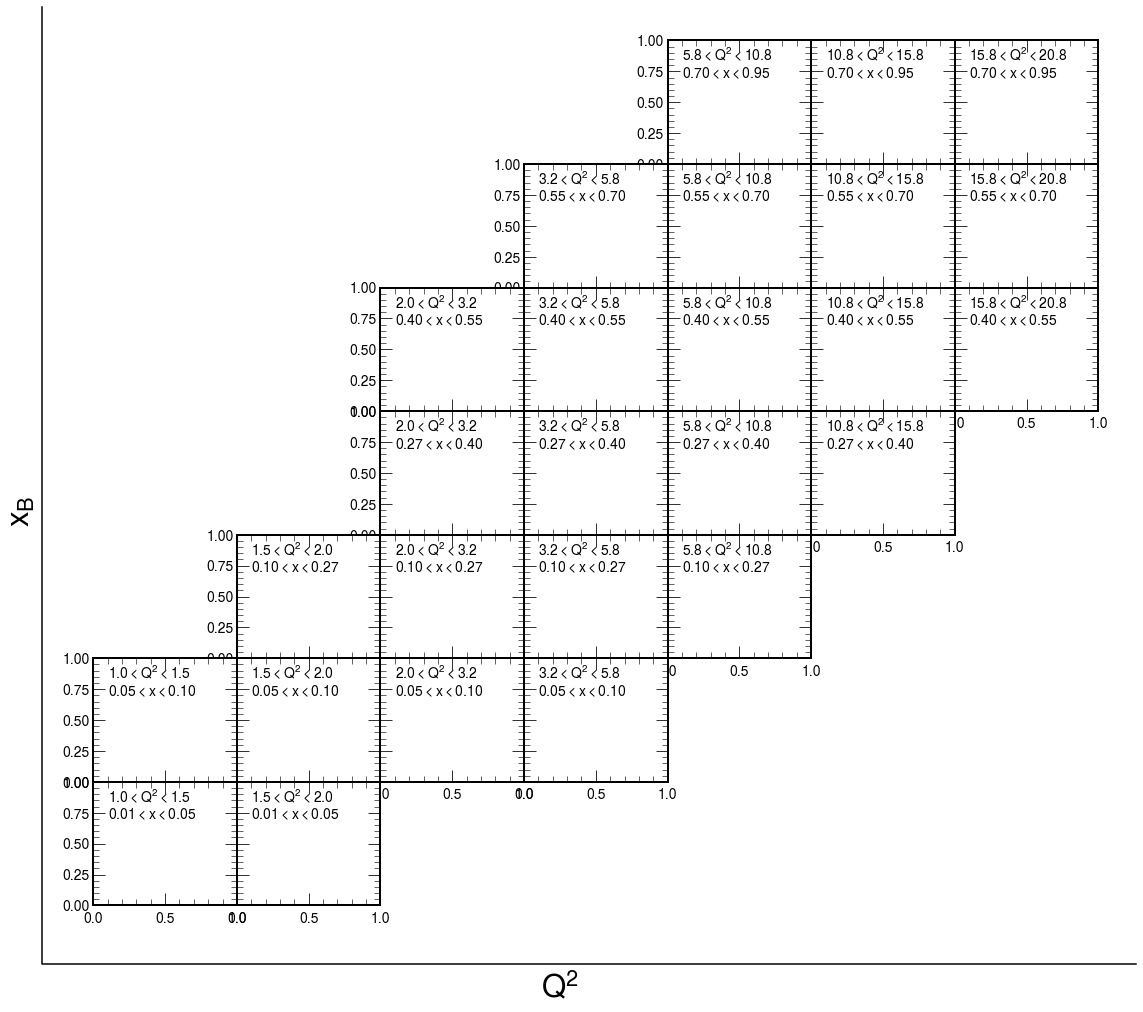

In [3]:
fig, axs = make_x_Q2_panels()

#fig.text(0, 0.5, "$x_B$")
#fig.text(0.5, 0, "$Q^2$")
#fig.line((0.1,1),(0.1,0.1), linestyle='-')
plt.show()

In [40]:
# import random
# #help(random)
# r=random.Random()
# N = 1000000
# d={"Q2":[1/r.uniform(1/20, 1) for i in range(N)], "x": [1/r.uniform(1, 1000) for i in range(N)],
#   "z":[1/r.uniform(1,10) for i in range(N)], "pT2": [1/r.uniform(.2, 10) for i in range(N)],
#   "pid":[[211, -211, 111, 321, -321, 2212][r.randint(0,5)] for i in range(N)],
#   "leading_pid": [[211, -211][r.randint(0,1)] for i in range(N)],
#   "leading_z": [r.uniform(0.5, 1) for i in range(N)]}


# df_hadrons_D = pd.DataFrame(d)
# df_hadrons_A = pd.DataFrame(d)

#df_electrons_D=pd.DataFrame(d)
#df_electrons_A=pd.DataFrame(d)
print(np.arctan2(1,0))

1.5707963267948966


In [4]:

Mp = .9383

import root_pandas

dfs={}
f={}
t={}

In [6]:
Ebeam = 22
for a in "DC":
    f[a]=ROOT.TFile(f'ahmed/{a}_22GeV.root')
    t[a]=f[a].Get("RootTuple")
    N=t[a].GetEntries()
    print(N)
    d={}
    for var in 'x Q2 z leading_z pT2 leading_pid pid leading_pT2 leading_phi phi'.split():
        d[var]=[]
    count=0
    print([b.GetName() for b in t[a].GetListOfBranches()])
    for event in t[a]:
        if event.Q2<1:
            continue
        if event.nu/Ebeam>0.85:
            continue
        W=np.sqrt(-event.Q2+Mp**2+2*Mp*event.nu)
        if W<2:
            continue
        if not count%10000 :
            print(count, "/", N, "%.3f%%"% (count/N*100))
        #if count > 100000:
        #    break
        Emax=0
        pid_leading=0
        for h in range(len(event.Px)):
            if event.E[h]>Emax:
                Emax = event.E[h]
                h_at_max=h
        pid_leading = event.barcode[h_at_max]
        pT2_leading = event.Px[h_at_max]**2+event.Py[h_at_max]**2
        phi_leading = np.arctan2(event.Py[h_at_max], event.Px[h_at_max])
        z_leading=Emax/event.nu
        for h in range(len(event.Px)):
            d['Q2'].append(event.Q2)
            d['x'].append(event.Q2/(Mp*2*event.nu))
            d['z'].append(event.E[h]/event.nu)
            d['pT2'].append(event.Px[h]**2+event.Py[h]**2)
            d['pid'].append(event.barcode[h])
            d['leading_z'].append(z_leading)
            d['leading_pid'].append(pid_leading)
            d['leading_pT2'].append(pT2_leading)
            d['leading_phi'].append(phi_leading)
            d['phi'].append(np.arctan2(event.Py[h], event.Px[h]))
        count+=1
    dfs[a] = pd.DataFrame(d)
    root_pandas.to_root(dfs[a],f'ahmed/{a}_22GeV_hadrons.root', 'hadrons')
df_hadrons_D = dfs['D']
df_hadrons_A = dfs['C']

OSError: Failed to open file ahmed/D_22GeV.root

Error in <TFile::TFile>: file /home/sebouh/di-hadron/ahmed/D_22GeV.root does not exist


1590000 / 11999142 13.251%
1600000 / 11999142 13.334%
1610000 / 11999142 13.418%
1620000 / 11999142 13.501%
1630000 / 11999142 13.584%
1640000 / 11999142 13.668%
1650000 / 11999142 13.751%
1660000 / 11999142 13.834%
1670000 / 11999142 13.918%
1680000 / 11999142 14.001%
1690000 / 11999142 14.084%
1700000 / 11999142 14.168%
1710000 / 11999142 14.251%
1720000 / 11999142 14.334%
1730000 / 11999142 14.418%
1740000 / 11999142 14.501%
1750000 / 11999142 14.584%
1760000 / 11999142 14.668%
1770000 / 11999142 14.751%
1780000 / 11999142 14.834%
1790000 / 11999142 14.918%
1800000 / 11999142 15.001%
1810000 / 11999142 15.084%
1820000 / 11999142 15.168%
1830000 / 11999142 15.251%
1840000 / 11999142 15.334%
1850000 / 11999142 15.418%
1860000 / 11999142 15.501%
1870000 / 11999142 15.584%
1880000 / 11999142 15.668%
1890000 / 11999142 15.751%
1900000 / 11999142 15.834%
1910000 / 11999142 15.918%
1920000 / 11999142 16.001%
1930000 / 11999142 16.084%
1940000 / 11999142 16.168%
1950000 / 11999142 16.251%
1

4630000 / 11999142 38.586%
4640000 / 11999142 38.669%
4650000 / 11999142 38.753%
4660000 / 11999142 38.836%
4670000 / 11999142 38.919%
4680000 / 11999142 39.003%
4690000 / 11999142 39.086%
4700000 / 11999142 39.169%
4710000 / 11999142 39.253%
4720000 / 11999142 39.336%
4730000 / 11999142 39.419%
4740000 / 11999142 39.503%
4750000 / 11999142 39.586%
4760000 / 11999142 39.670%
4770000 / 11999142 39.753%
4780000 / 11999142 39.836%
4790000 / 11999142 39.920%
4800000 / 11999142 40.003%
4810000 / 11999142 40.086%
4820000 / 11999142 40.170%
4830000 / 11999142 40.253%
4840000 / 11999142 40.336%
4850000 / 11999142 40.420%
4860000 / 11999142 40.503%
4870000 / 11999142 40.586%
4880000 / 11999142 40.670%
4890000 / 11999142 40.753%
4900000 / 11999142 40.836%
4910000 / 11999142 40.920%
4920000 / 11999142 41.003%
4930000 / 11999142 41.086%
4940000 / 11999142 41.170%
4950000 / 11999142 41.253%
4960000 / 11999142 41.336%
4970000 / 11999142 41.420%
4980000 / 11999142 41.503%
4990000 / 11999142 41.586%
5

7670000 / 11999142 63.921%
7680000 / 11999142 64.005%
7690000 / 11999142 64.088%
7700000 / 11999142 64.171%
7710000 / 11999142 64.255%
7720000 / 11999142 64.338%
7730000 / 11999142 64.421%
7740000 / 11999142 64.505%
7750000 / 11999142 64.588%
7760000 / 11999142 64.671%
7770000 / 11999142 64.755%
7780000 / 11999142 64.838%
7790000 / 11999142 64.921%
7800000 / 11999142 65.005%
7810000 / 11999142 65.088%
7820000 / 11999142 65.171%
7830000 / 11999142 65.255%
7840000 / 11999142 65.338%
7850000 / 11999142 65.421%
7860000 / 11999142 65.505%
7870000 / 11999142 65.588%
7880000 / 11999142 65.671%
7890000 / 11999142 65.755%
7900000 / 11999142 65.838%
7910000 / 11999142 65.921%
7920000 / 11999142 66.005%
7930000 / 11999142 66.088%
7940000 / 11999142 66.171%
7950000 / 11999142 66.255%
7960000 / 11999142 66.338%
7970000 / 11999142 66.421%
7980000 / 11999142 66.505%
7990000 / 11999142 66.588%
8000000 / 11999142 66.671%
8010000 / 11999142 66.755%
8020000 / 11999142 66.838%
8030000 / 11999142 66.921%
8

In [7]:
Ebeam = 10.6
Mp = .9383

import root_pandas

for a in "DC":
    f[a+"_10pt6GeV"]=ROOT.TFile(f'ahmed/{a}_10pt6GeV.root')
    t[a+"_10pt6GeV"]=f[a+"_10pt6GeV"].Get("RootTuple")
    N=t[a+"_10pt6GeV"].GetEntries()
    print(N)
    d={}
    for var in 'x Q2 z leading_z pT2 leading_pid pid leading_pT2 leading_phi phi'.split():
        d[var]=[]
    count=0
    print([b.GetName() for b in t[a+"_10pt6GeV"].GetListOfBranches()])
    for event in t[a+"_10pt6GeV"]:
        if event.Q2<1:
            continue
        if event.nu/Ebeam>0.85:
            continue
        W=np.sqrt(-event.Q2+Mp**2+2*Mp*event.nu)
        if W<2:
            continue
        if not count%10000 :
            print(count, "/", N, "%.3f%%"% (count/N*100))
        #if count > 100000:
        #    break
        Emax=0
        pid_leading=0
        for h in range(len(event.Px)):
            if event.E[h]>Emax:
                Emax = event.E[h]
                h_at_max=h
        pid_leading = event.barcode[h_at_max]
        pT2_leading = event.Px[h_at_max]**2+event.Py[h_at_max]**2
        phi_leading = np.arctan2(event.Py[h_at_max], event.Px[h_at_max])
        z_leading=Emax/event.nu
        for h in range(len(event.Px)):
            d['Q2'].append(event.Q2)
            d['x'].append(event.Q2/(Mp*2*event.nu))
            d['z'].append(event.E[h]/event.nu)
            d['pT2'].append(event.Px[h]**2+event.Py[h]**2)
            d['pid'].append(event.barcode[h])
            d['leading_z'].append(z_leading)
            d['leading_pid'].append(pid_leading)
            d['leading_pT2'].append(pT2_leading)
            d['leading_phi'].append(phi_leading)
            d['phi'].append(np.arctan2(event.Py[h], event.Px[h]))
        count+=1
    dfs[a+"_10pt6"] = pd.DataFrame(d)
    root_pandas.to_root(dfs[a+"_10pt6"],f'ahmed/{a}_10pt6GeV_hadrons.root', 'hadrons')
df_hadrons_D_10pt6 = dfs['D_10pt6']
df_hadrons_A_10pt6 = dfs['C_10pt6']

OSError: Failed to open file ahmed/D_10pt6GeV.root

Error in <TFile::TFile>: file /home/sebouh/di-hadron/ahmed/D_10pt6GeV.root does not exist


6360000 / 9999075 63.606%
6370000 / 9999075 63.706%
6380000 / 9999075 63.806%
6390000 / 9999075 63.906%
6400000 / 9999075 64.006%
6410000 / 9999075 64.106%
6420000 / 9999075 64.206%
6430000 / 9999075 64.306%
6440000 / 9999075 64.406%
6450000 / 9999075 64.506%
6460000 / 9999075 64.606%
6470000 / 9999075 64.706%
6480000 / 9999075 64.806%
6490000 / 9999075 64.906%
6500000 / 9999075 65.006%
6510000 / 9999075 65.106%
6520000 / 9999075 65.206%
6530000 / 9999075 65.306%
6540000 / 9999075 65.406%
6550000 / 9999075 65.506%
6560000 / 9999075 65.606%
6570000 / 9999075 65.706%
6580000 / 9999075 65.806%
6590000 / 9999075 65.906%
6600000 / 9999075 66.006%
6610000 / 9999075 66.106%
6620000 / 9999075 66.206%
6630000 / 9999075 66.306%
6640000 / 9999075 66.406%
6650000 / 9999075 66.506%
6660000 / 9999075 66.606%
6670000 / 9999075 66.706%
11998568
['weight', 'barcode', 'Px', 'Py', 'Pz', 'E', 'evType', 'nu', 'Q2', 'eps', 'phiL']
0 / 11998568 0.000%
10000 / 11998568 0.083%
20000 / 11998568 0.167%
30000 / 1

2780000 / 11998568 23.169%
2790000 / 11998568 23.253%
2800000 / 11998568 23.336%
2810000 / 11998568 23.419%
2820000 / 11998568 23.503%
2830000 / 11998568 23.586%
2840000 / 11998568 23.669%
2850000 / 11998568 23.753%
2860000 / 11998568 23.836%
2870000 / 11998568 23.920%
2880000 / 11998568 24.003%
2890000 / 11998568 24.086%
2900000 / 11998568 24.170%
2910000 / 11998568 24.253%
2920000 / 11998568 24.336%
2930000 / 11998568 24.420%
2940000 / 11998568 24.503%
2950000 / 11998568 24.586%
2960000 / 11998568 24.670%
2970000 / 11998568 24.753%
2980000 / 11998568 24.836%
2990000 / 11998568 24.920%
3000000 / 11998568 25.003%
3010000 / 11998568 25.086%
3020000 / 11998568 25.170%
3030000 / 11998568 25.253%
3040000 / 11998568 25.336%
3050000 / 11998568 25.420%
3060000 / 11998568 25.503%
3070000 / 11998568 25.586%
3080000 / 11998568 25.670%
3090000 / 11998568 25.753%
3100000 / 11998568 25.836%
3110000 / 11998568 25.920%
3120000 / 11998568 26.003%
3130000 / 11998568 26.086%
3140000 / 11998568 26.170%
3

5820000 / 11998568 48.506%
5830000 / 11998568 48.589%
5840000 / 11998568 48.672%
5850000 / 11998568 48.756%
5860000 / 11998568 48.839%
5870000 / 11998568 48.923%
5880000 / 11998568 49.006%
5890000 / 11998568 49.089%
5900000 / 11998568 49.173%
5910000 / 11998568 49.256%
5920000 / 11998568 49.339%
5930000 / 11998568 49.423%
5940000 / 11998568 49.506%
5950000 / 11998568 49.589%
5960000 / 11998568 49.673%
5970000 / 11998568 49.756%
5980000 / 11998568 49.839%
5990000 / 11998568 49.923%
6000000 / 11998568 50.006%
6010000 / 11998568 50.089%
6020000 / 11998568 50.173%
6030000 / 11998568 50.256%
6040000 / 11998568 50.339%
6050000 / 11998568 50.423%
6060000 / 11998568 50.506%
6070000 / 11998568 50.589%
6080000 / 11998568 50.673%
6090000 / 11998568 50.756%
6100000 / 11998568 50.839%
6110000 / 11998568 50.923%
6120000 / 11998568 51.006%
6130000 / 11998568 51.089%
6140000 / 11998568 51.173%
6150000 / 11998568 51.256%
6160000 / 11998568 51.339%
6170000 / 11998568 51.423%
6180000 / 11998568 51.506%
6

In [5]:

import root_pandas

df_hadrons_D_10pt6 =root_pandas.read_root(f'ahmed/D_10pt6GeV_hadrons.root', 'hadrons')
df_hadrons_A_10pt6 =root_pandas.read_root(f'ahmed/C_10pt6GeV_hadrons.root', 'hadrons')

t={}
f={}
for a in "DC":
    f[a]=ROOT.TFile(f'ahmed/{a}_22GeV.root')
    t[a]=f[a].Get("RootTuple")
    f[a+"_10pt6GeV"]=ROOT.TFile(f'ahmed/{a}_10pt6GeV.root')
    t[a+"_10pt6GeV"]=f[a+"_10pt6GeV"].Get("RootTuple")

In [11]:
rm -rf ahmed

In [11]:
#determine the ratio between the number of events we expect to get and the number that were generated

lumi = 8.6e11 # mub^-1, corresponding to 100 PAC days at 10^35 cm^-2 s^-1

sigma_C_22GeV=206 #mub
factorA = lumi*sigma_C_22GeV/t['C'].GetEntries()

sigma_D_22GeV=34 #mub
factorD = lumi*sigma_D_22GeV/t['D'].GetEntries()

print(factorA, factorD)

14764388.987145914 2924152.9331984064


In [ ]:
plt.hist(df_hadrons_A.eval("Q2/(22*2*x*.9383)"), bins=100)
plt.yscale('log')
plt.show()

In [ ]:
eRatios={}
for i in range(len(x_partitions)-1):
    for j in range(len(Q2_partitions)-1):
        Q2min=Q2_partitions[j]
        Q2max=Q2_partitions[j+1]
        xmin=x_partitions[i]
        xmax=x_partitions[i+1]
        q=f"Q2>{Q2min} && Q2<{Q2max} && Q2/(2*0.9383*nu)>{xmin} && Q2/(2*0.9383*nu)<{xmax} && sqrt(-Q2+{Mp**2}+{2*Mp}*nu)>2 && nu/{Ebeam}<.85"
        key = (Q2min, Q2max, xmin, xmax)
        if bins_used[i][j]:
            eRatios[(Q2min, Q2max, xmin,xmax)]=t['C'].GetEntries(q)/t['D'].GetEntries(q)


In [ ]:
print(eRatios)

In [ ]:
def plotMR(dfA, dfD,  pids, hvar, binning, label, eRatio, Q2min, Q2max, xmin, xmax, statOnly=False):
    if type(pids)==int:
        pids=(pids,)
    
    for i, pid in enumerate(pids):
        q=f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax}"
        dfAq=dfA.query(q)
        dfDq=dfD.query(q)
        hA,x = np.histogram(dfAq.eval(hvar), bins=binning)
        hD,_ = np.histogram(dfDq.eval(hvar), bins=binning)
        if not statOnly:
            Rh=hA/hD/eRatio
            dRh=hA/hD*np.sqrt(1/hA+1/hD)/eRatio
        else:
            Rh=[0]*len(hA)
            dRh=np.sqrt(1/hA/factorA+1/hD/factorD)
        
        #shift the bin centers for clarity
        shift = (-len(pids)/2+i+1/2)/(2.0*len(pids))
        
        bincenters=(x[1:]+x[:-1])/2+shift*(x[1:]-x[:-1])
        goodbins=(hA>5) & (hD>5)
        plt.errorbar(pd.Series(bincenters)[goodbins], pd.Series(Rh)[goodbins], pd.Series(dRh)[goodbins], marker='o', linestyle='')
    plt.xlabel(label, fontsize=14)
    if statOnly:
        plt.ylabel("$\Delta R_h/R_h$", fontsize=14)
    else:
        plt.ylabel("$R_h$", fontsize=14)
    #plt.ylabel("MR", fontsize=14)

In [ ]:
def plotR2h(dfA, dfD,  pids, hvar, binning, label, Q2min, Q2max, xmin, xmax, statOnly=False):
    for i, pid in enumerate(pids):
        q=f"pid=={pid[1]} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and leading_z>0.5 and leading_pid=={pid[0]}"
        dfAq=dfA.query(q)
        dfDq=dfD.query(q)
        hA,x = np.histogram(dfAq.eval(hvar), bins=binning)
        hD,_ = np.histogram(dfDq.eval(hvar), bins=binning)
        
        if not statOnly:
            singleyieldA=len(dfA.query(f"pid=={pid[0]} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and z>0.5"))
            singleyieldD=len(dfD.query(f"pid=={pid[0]} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and z>0.5"))
        
            Rh=hA/hD*singleyieldD/singleyieldA
            dRh=hA/hD*np.sqrt(1/(hA)+1/(hD))*singleyieldD/singleyieldA
        else:
            Rh=np.zeros(len(hD))
            dRh=np.sqrt(1/(hA*factorA)+1/(hD*factorD))
        
        #shift the bin centers for clarity
        shift = (-len(pids)/2+i+1/2)/(2.0*len(pids))
        
        bincenters=(x[1:]+x[:-1])/2+shift*(x[1:]-x[:-1])
        #print(i, pid, dRh/Rh)
        goodbins=(hA>0) & (hD>0)
        plt.errorbar(pd.Series(bincenters)[goodbins], pd.Series(Rh)[goodbins], pd.Series(dRh)[goodbins], marker='o', linestyle='')
        #plt.errorbar(bincenters, Rh, dRh, marker='o', linestyle='')
    plt.xlabel(label, fontsize=14)
    if not statOnly:
        plt.ylabel("$R_{2h}$", fontsize=14)
    else:
        plt.ylabel("$\Delta R_{2h}/R_{2h}$", fontsize=14)

In [ ]:
def plotBroadening(dfA, dfD, pids, hvar, binning, label, Q2min, Q2max, xmin, xmax,statOnly=False):
    for j, pid in enumerate(pids):
        q=f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax}"
        dfAq=dfA.query(q)
        dfDq=dfD.query(q)
        bincenters=[]
        broadenings=[]
        dbroadenings=[]
        hA=[]
        hD=[]
        for i in range(len(binning)-1):
            qbin=f"{hvar}>{binning[i]} and {hvar}<{binning[i+1]}"
            pT2A=dfAq.query(qbin).eval("pT2")
            pT2D=dfDq.query(qbin).eval("pT2")
            hA.append(len(pT2A))
            hD.append(len(pT2D))
            if not statOnly:
                broadenings.append(np.mean(pT2A)-np.mean(pT2D))
                dA=np.std(pT2A)/np.sqrt(len(pT2A))
                dD=np.std(pT2D)/np.sqrt(len(pT2D))
                dbroadenings.append(np.hypot(dA,dD))
            else :
                broadenings.append(0)
                dA=np.std(pT2A)/np.sqrt(len(pT2A)*factorA)
                dD=np.std(pT2D)/np.sqrt(len(pT2D)*factorD)
                dbroadenings.append(np.hypot(dA,dD)/np.mean(pT2D))
                
        x=binning
        
        #shift the bin centers for clarity
        shift = (-len(pids)/2+j+1/2)/(2.0*len(pids))
        hA=np.array(hA)
        hD=np.array(hD)
        bincenters=(x[1:]+x[:-1])/2+shift*(x[1:]-x[:-1])
        goodbins=(hA>0) & (hD>0)
        plt.errorbar(pd.Series(bincenters)[goodbins], pd.Series(broadenings)[goodbins], pd.Series(dbroadenings)[goodbins], marker='o', linestyle='')
    plt.xlabel(label, fontsize=14)
    if not statOnly:
        plt.ylabel("$\Delta \\langle p_T^2\\rangle$ [GeV$^2$]", fontsize=14)
    else:
        plt.ylabel("$\Delta^{stat}[\Delta \\langle p_T^2\\rangle ]/\\langle p_{T}^2\\rangle_{D}$ ", fontsize=14)

In [ ]:
#now make the plots for MR vs Q2, x, and pT:
pid_lists=[[211, -211, 111, 321, -321, 2212]]
name_lists = [["$\pi^+$", "$\pi^-$", "$\pi^0$", "$K^+$", "$K^-$", "$p$"]]
for pids, names in zip(pid_lists, name_lists):
    def plotstuff(*param):
        plotMR(df_hadrons_A, df_hadrons_D,  pids, "pT2", (0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.8, 4),
               "$p^2_T$ [GeV$^2$]", eRatios[param], *param)
    fig, axs = make_x_Q2_panels(plotstuff)
    
    #for the legend
    for pid,name in zip(pids,names):
        axs[0][0].errorbar([],[],[], label=name)
    axs[0][0].legend(fontsize=20, ncol=2)
    #axs[0][0].text(0.5, 0.5, name, transform=axs[0][0].transAxes)
plt.show()

In [375]:
set(df_hadrons_A.pid)

{-3334,
 -3322,
 -3312,
 -3222,
 -3212,
 -3112,
 -2212,
 -2112,
 -431,
 -421,
 -411,
 -321,
 -311,
 -211,
 111,
 211,
 311,
 321,
 411,
 421,
 431,
 443,
 2112,
 2212,
 3112,
 3212,
 3222,
 3312,
 3322,
 3334,
 4112,
 4122,
 4212,
 4222}

<ipython-input-399-17b28204114b>:12: RuntimeWarning: invalid value encountered in true_divide
  Rh=hA/hD/eRatio
<ipython-input-399-17b28204114b>:13: RuntimeWarning: invalid value encountered in true_divide
  dRh=hA/hD*np.sqrt(1/hA+1/hD)/eRatio
<ipython-input-399-17b28204114b>:13: RuntimeWarning: divide by zero encountered in true_divide
  dRh=hA/hD*np.sqrt(1/hA+1/hD)/eRatio
<ipython-input-399-17b28204114b>:13: RuntimeWarning: invalid value encountered in multiply
  dRh=hA/hD*np.sqrt(1/hA+1/hD)/eRatio
<ipython-input-399-17b28204114b>:12: RuntimeWarning: invalid value encountered in true_divide
  Rh=hA/hD/eRatio
<ipython-input-399-17b28204114b>:13: RuntimeWarning: invalid value encountered in true_divide
  dRh=hA/hD*np.sqrt(1/hA+1/hD)/eRatio
<ipython-input-399-17b28204114b>:13: RuntimeWarning: divide by zero encountered in true_divide
  dRh=hA/hD*np.sqrt(1/hA+1/hD)/eRatio
<ipython-input-399-17b28204114b>:12: RuntimeWarning: divide by zero encountered in true_divide
  Rh=hA/hD/eRatio
<ipy

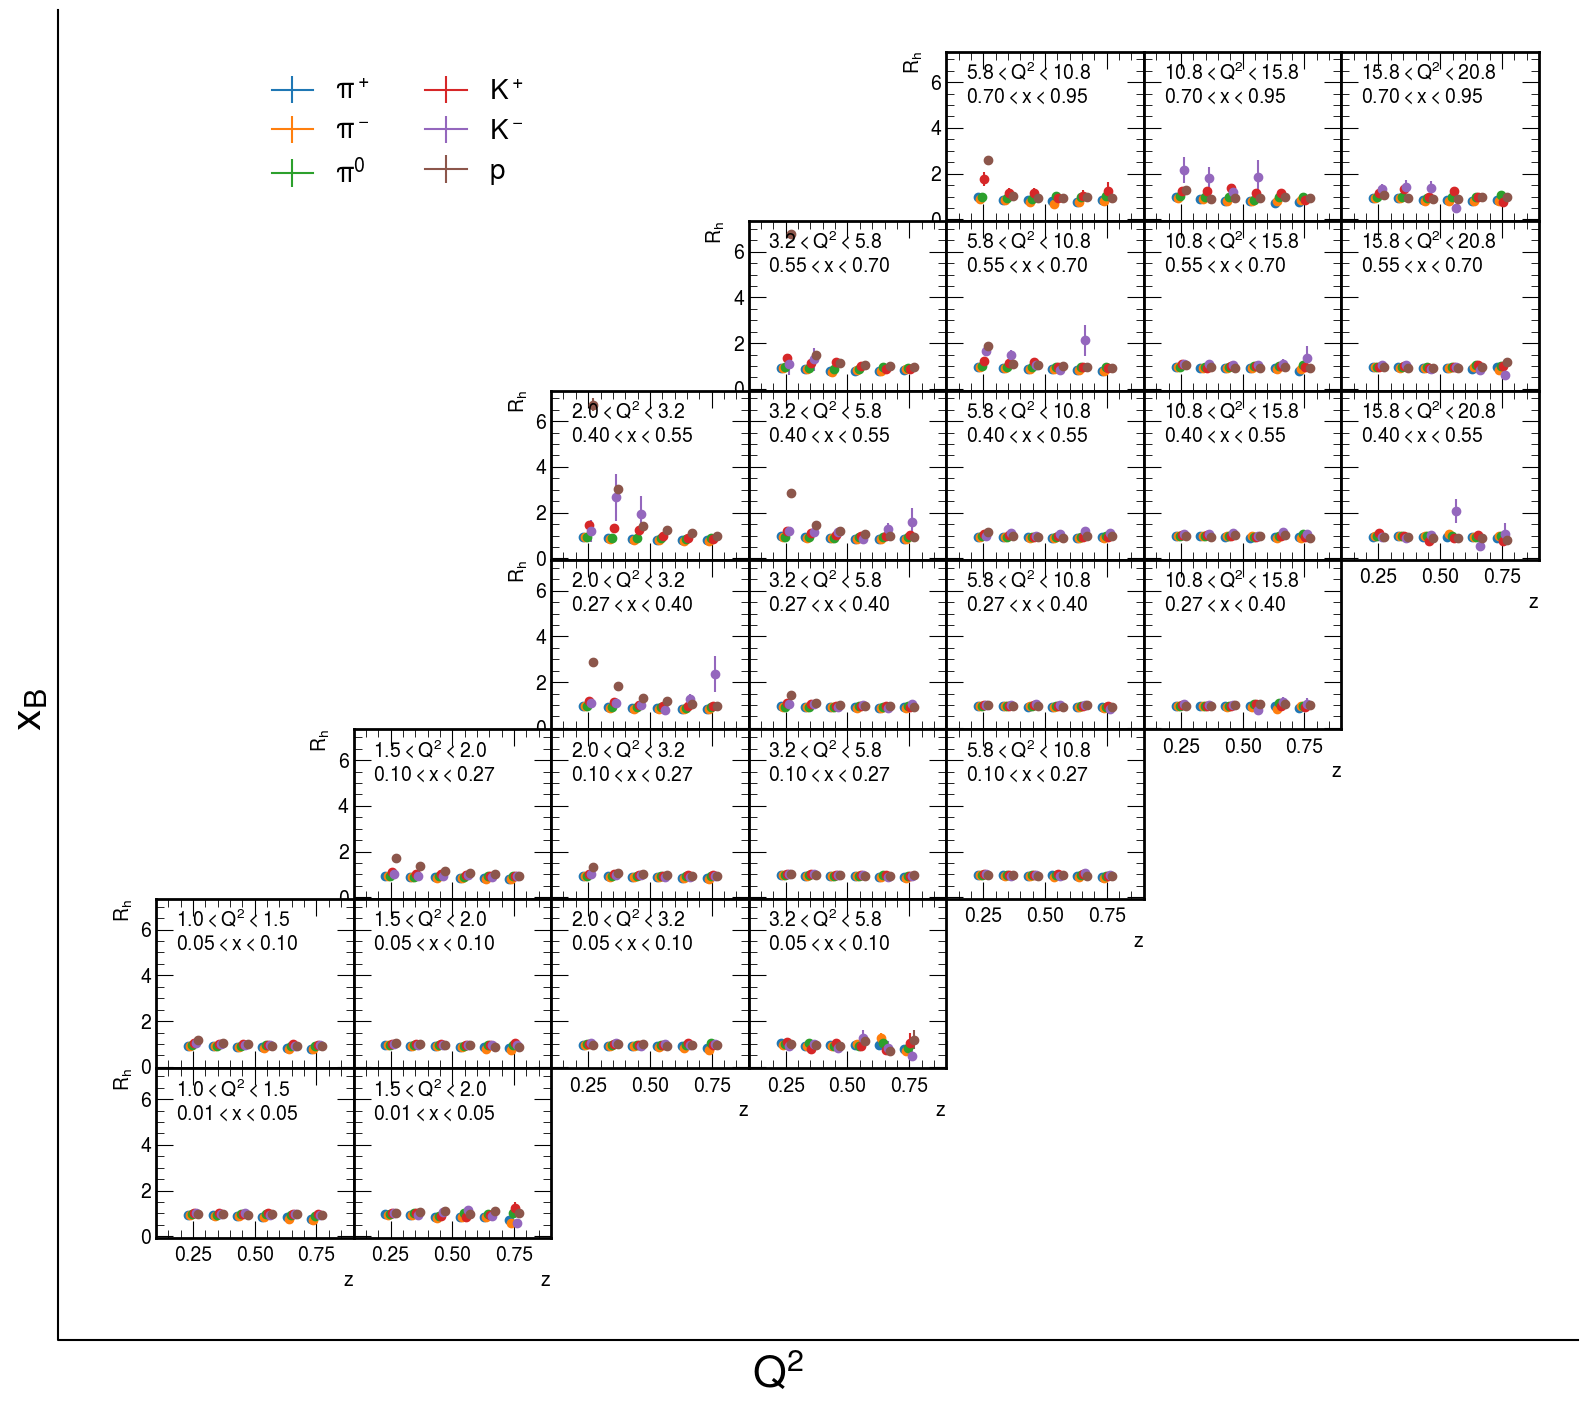

<ipython-input-399-17b28204114b>:16: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/hA/factorA+1/hD/factorD)
<ipython-input-399-17b28204114b>:16: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/hA/factorA+1/hD/factorD)
<ipython-input-399-17b28204114b>:16: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/hA/factorA+1/hD/factorD)
<ipython-input-399-17b28204114b>:16: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/hA/factorA+1/hD/factorD)
<ipython-input-399-17b28204114b>:16: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/hA/factorA+1/hD/factorD)


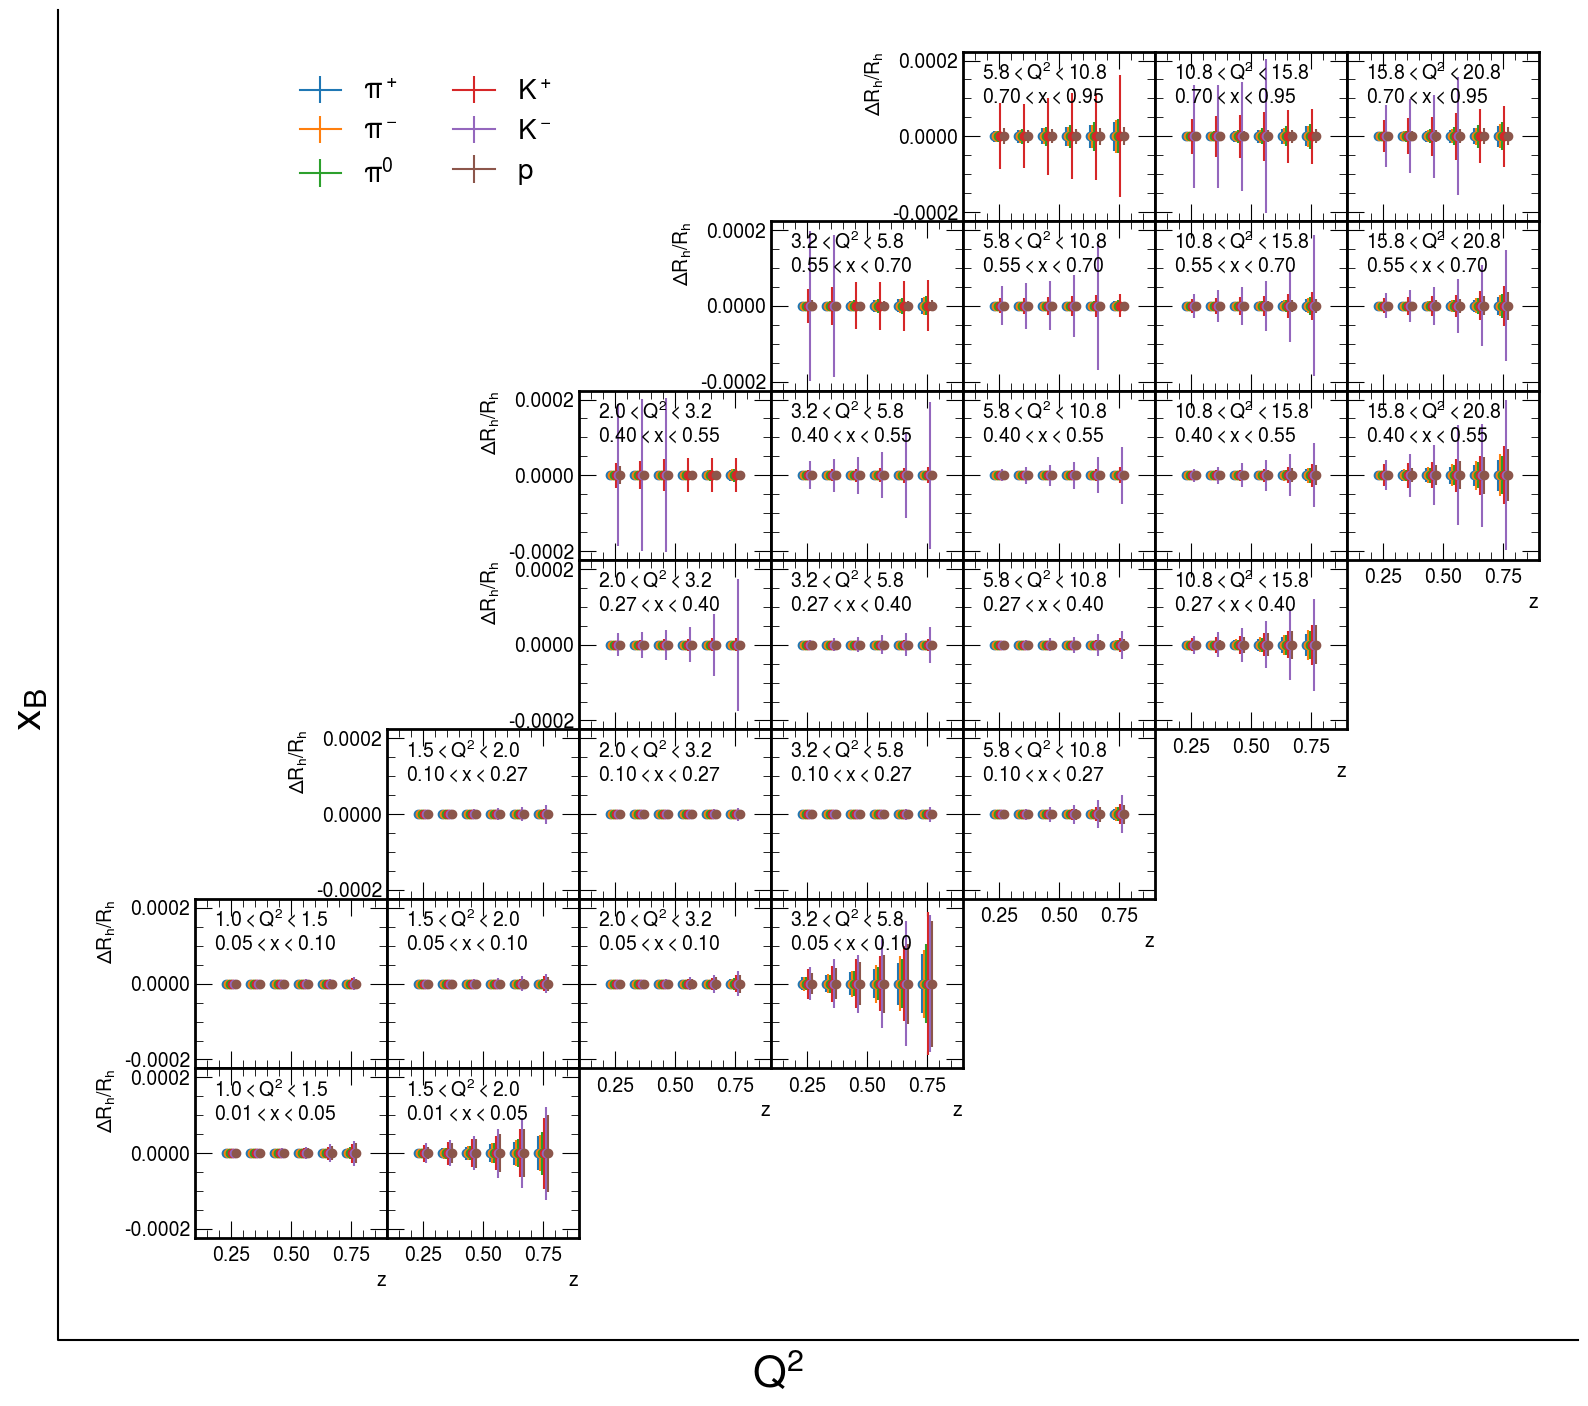

In [400]:
for statOnly in False, True:
    #now make the plots for MR vs Q2, x, and z:
    pid_lists=[[211, -211, 111, 321, -321, 2212]]
    name_lists = [["$\pi^+$", "$\pi^-$", "$\pi^0$", "$K^+$", "$K^-$", "$p$"]]
    #pid_lists=[[ 321, -321, 2212, 2112, 3122]]
    #name_lists = [["$K^+$", "$K^-$", "$p$", "$n$"]]
    for pids, names in zip(pid_lists, name_lists):
        def plotstuff(*param):
            plotMR(df_hadrons_A, df_hadrons_D,  pids,  "z", (0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8),
                   "$z$", eRatios[param], *param, statOnly)
            plt.gca().set_xlim(0.1, 0.9)
        fig, axs = make_x_Q2_panels(plotstuff)
        for pid,name in zip(pids,names):
            axs[0][1].errorbar([],[],[], label=name)
        axs[0][1].legend(fontsize=20, ncol=2)
    plt.show()

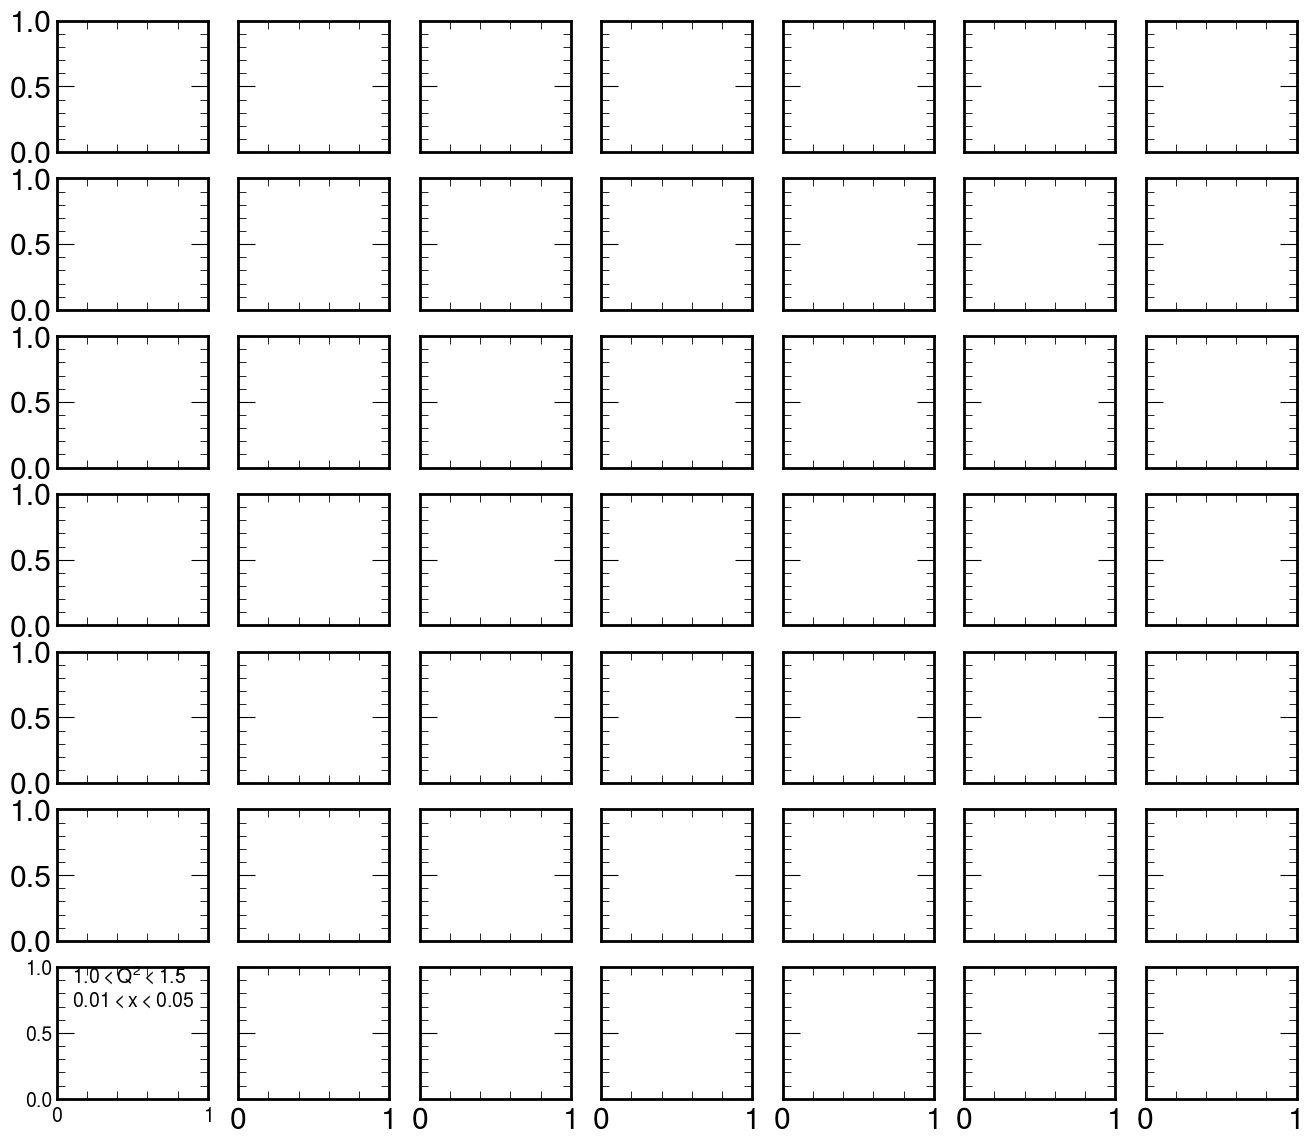

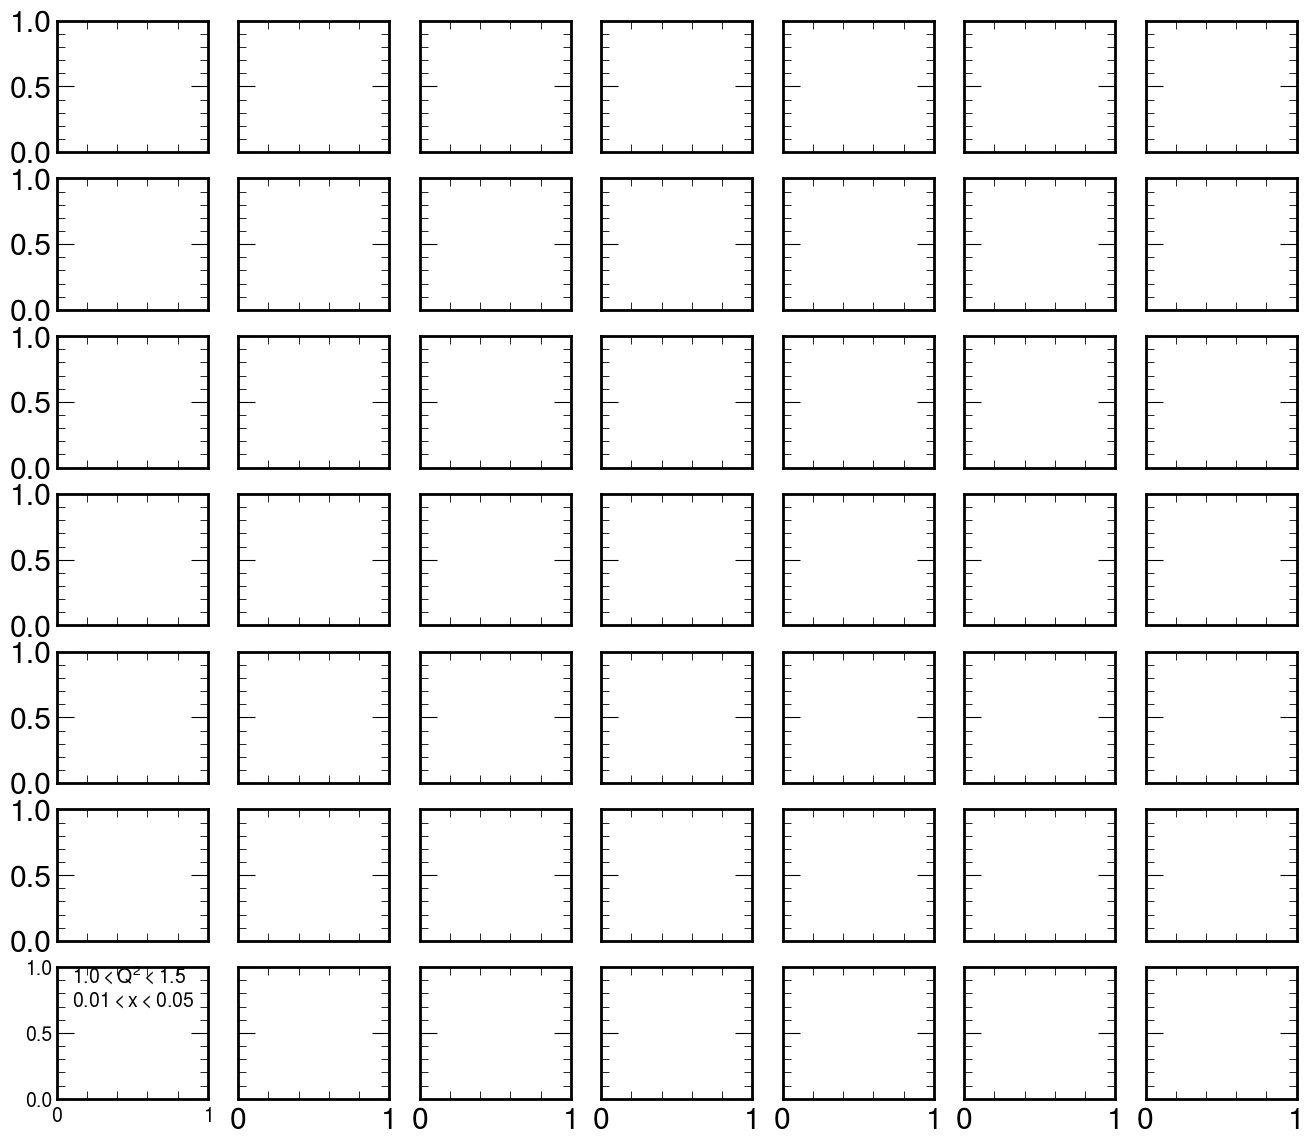

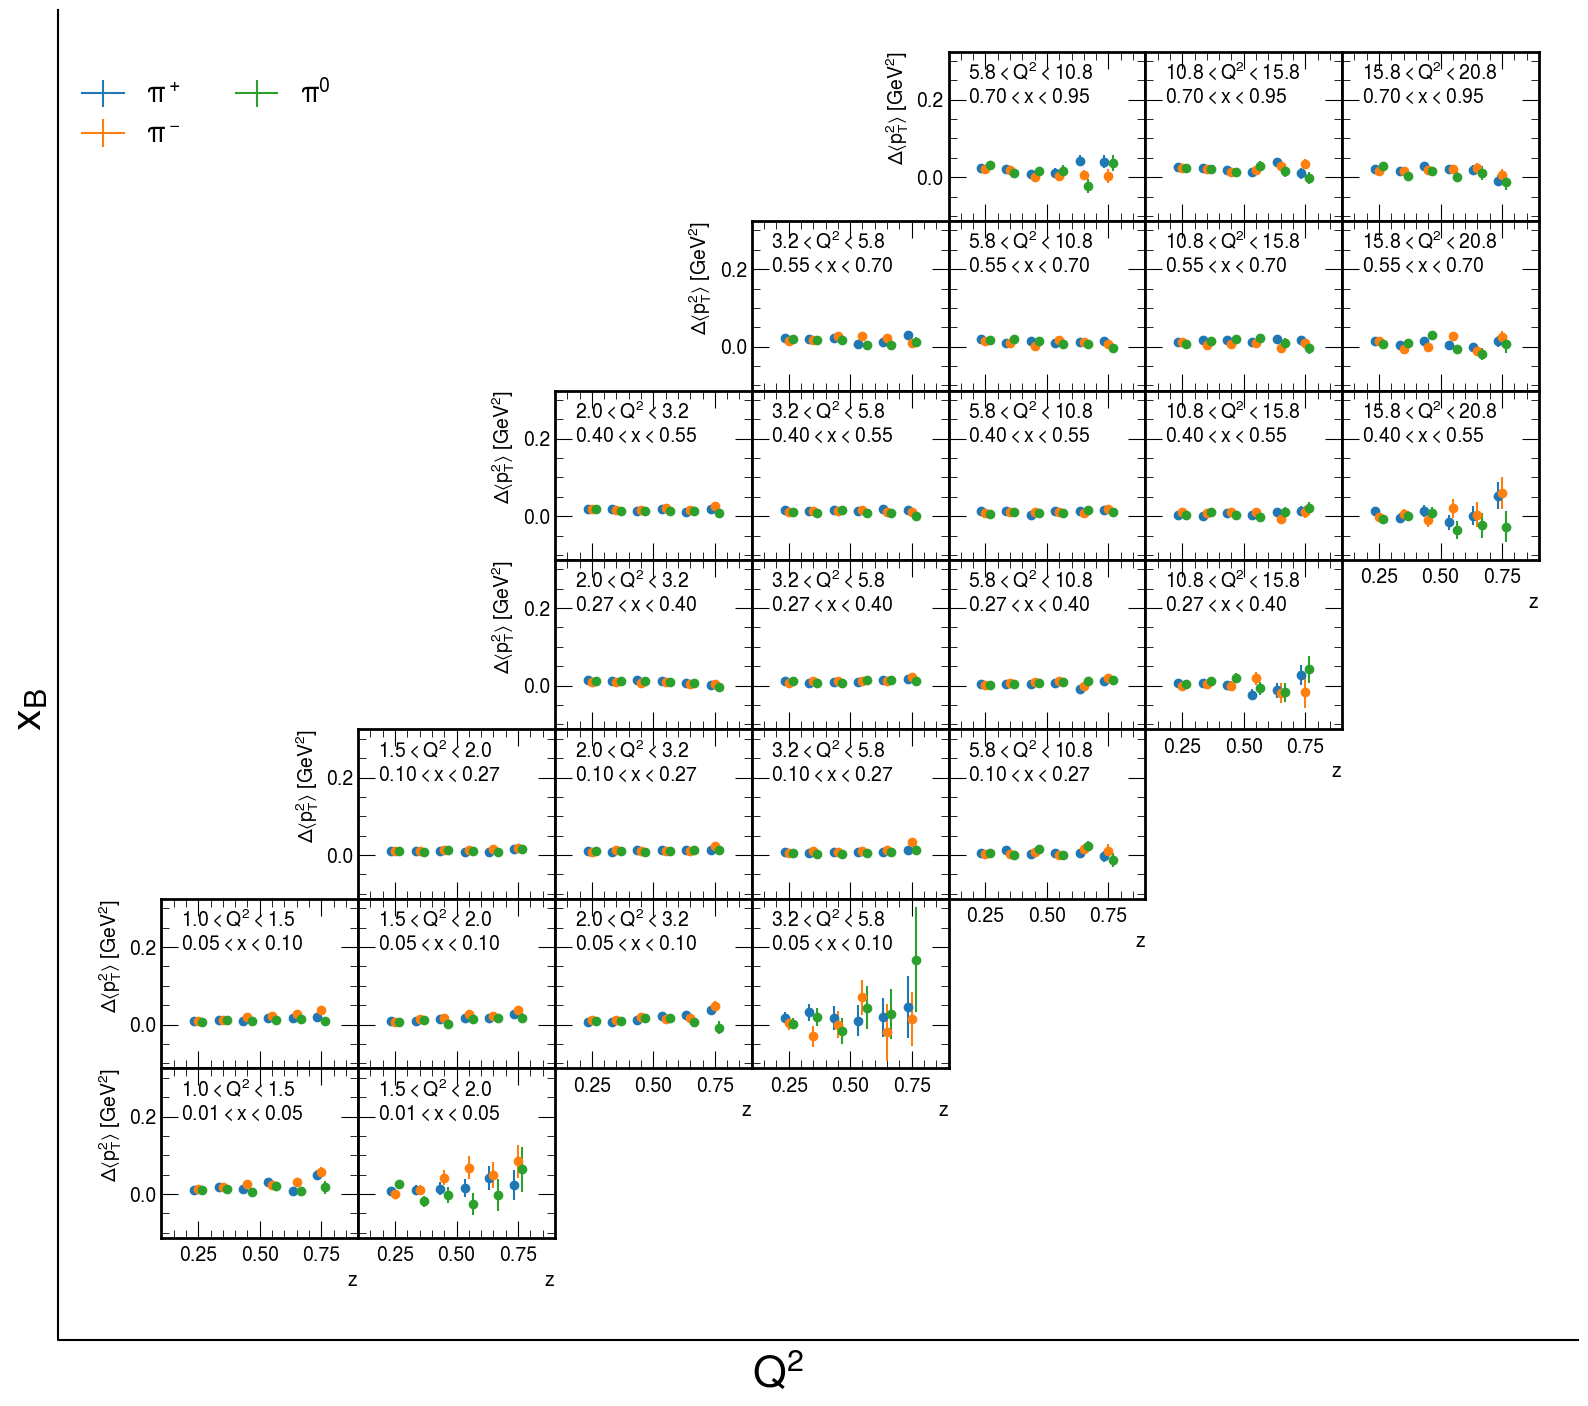

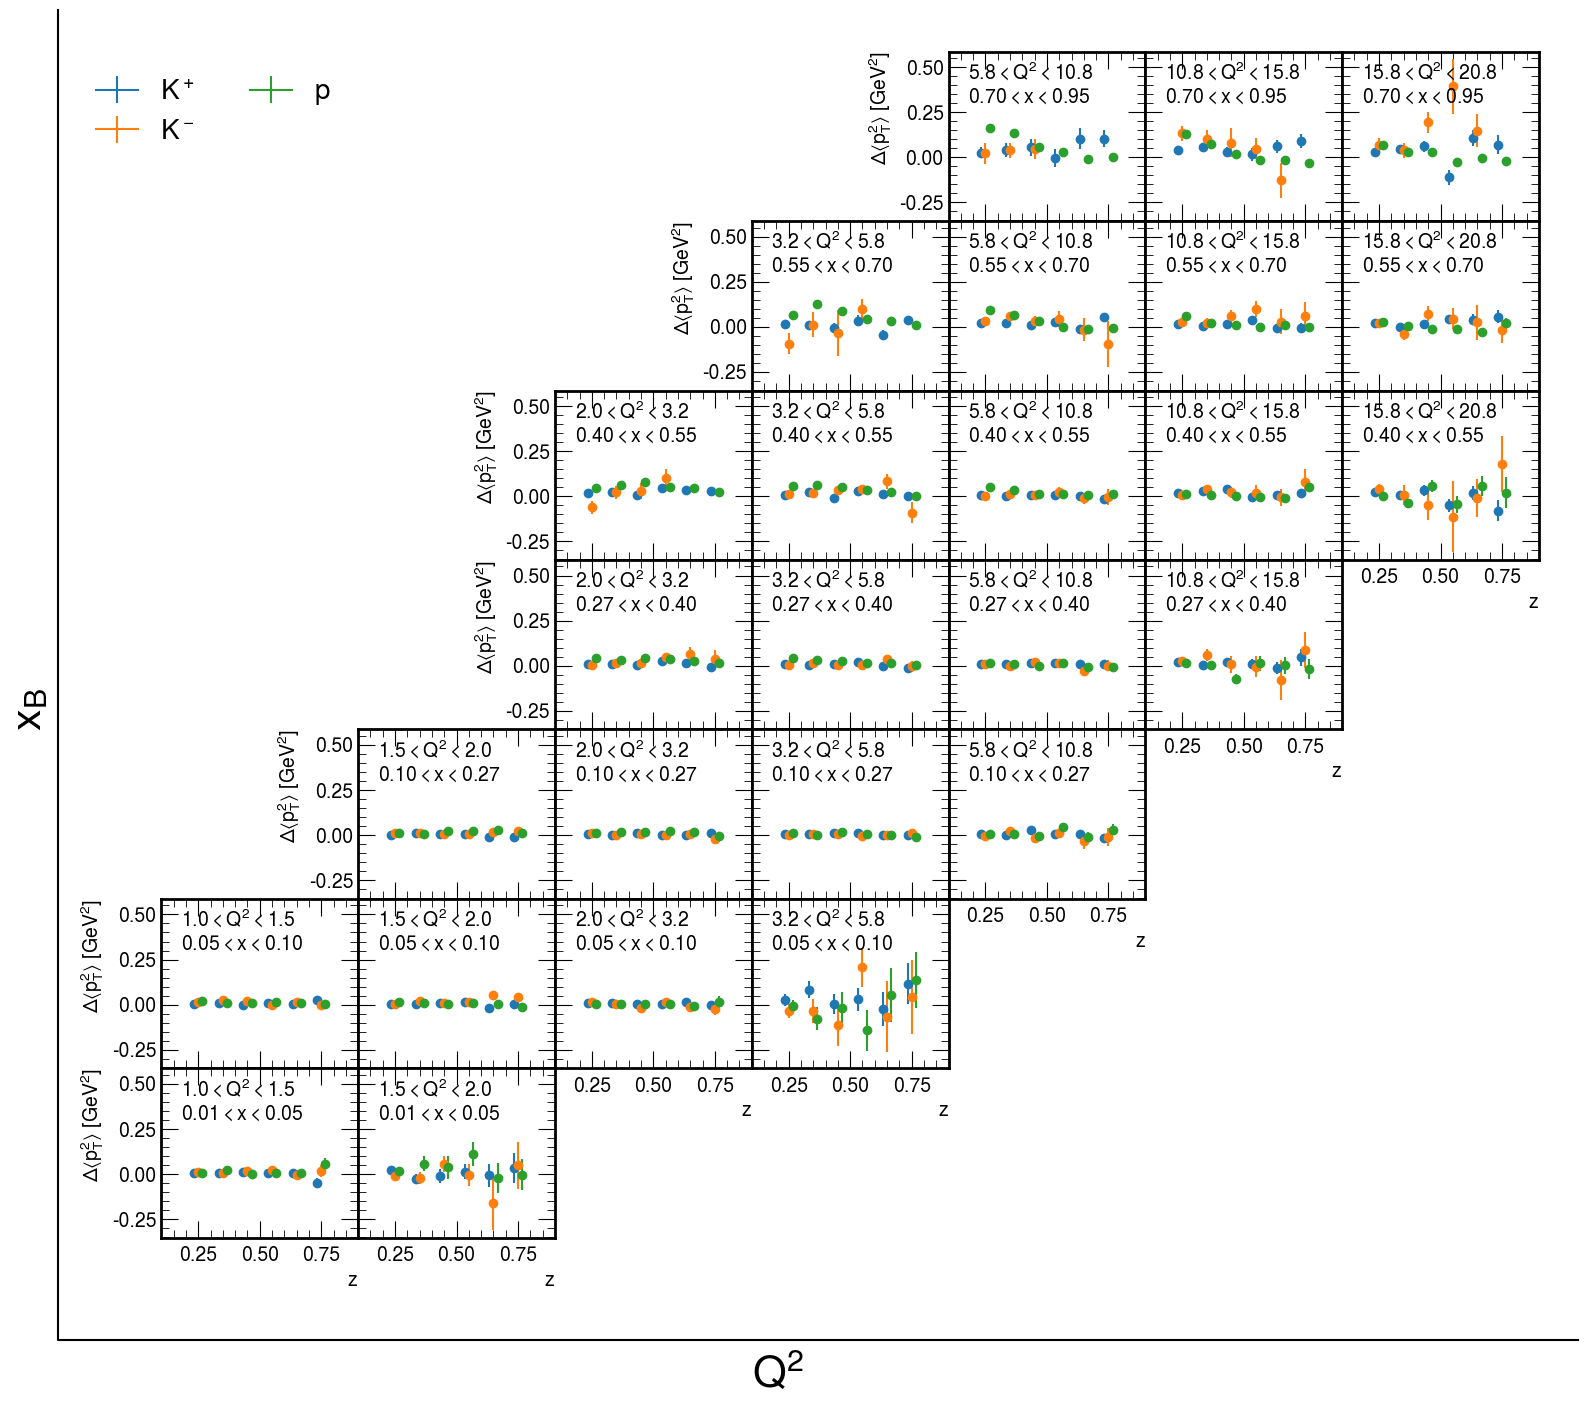

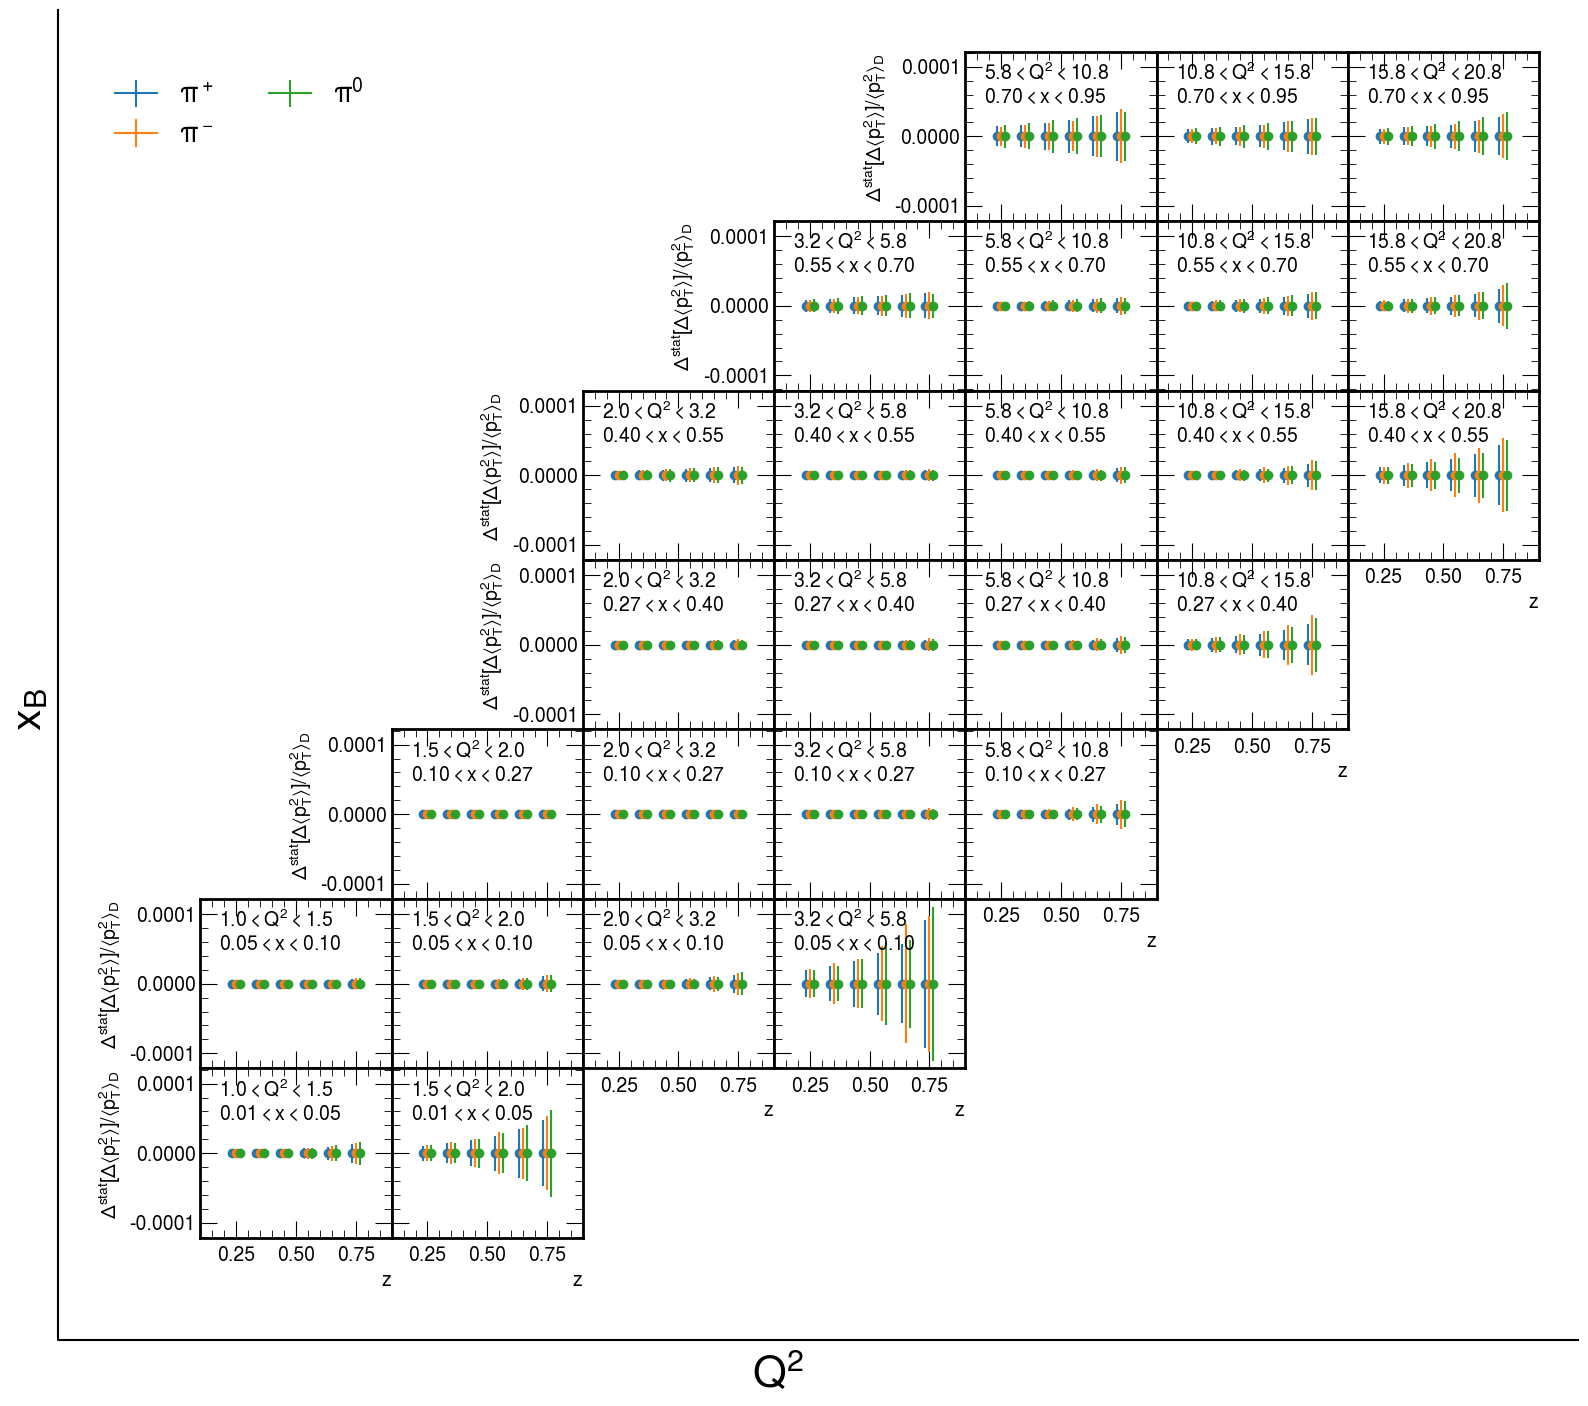

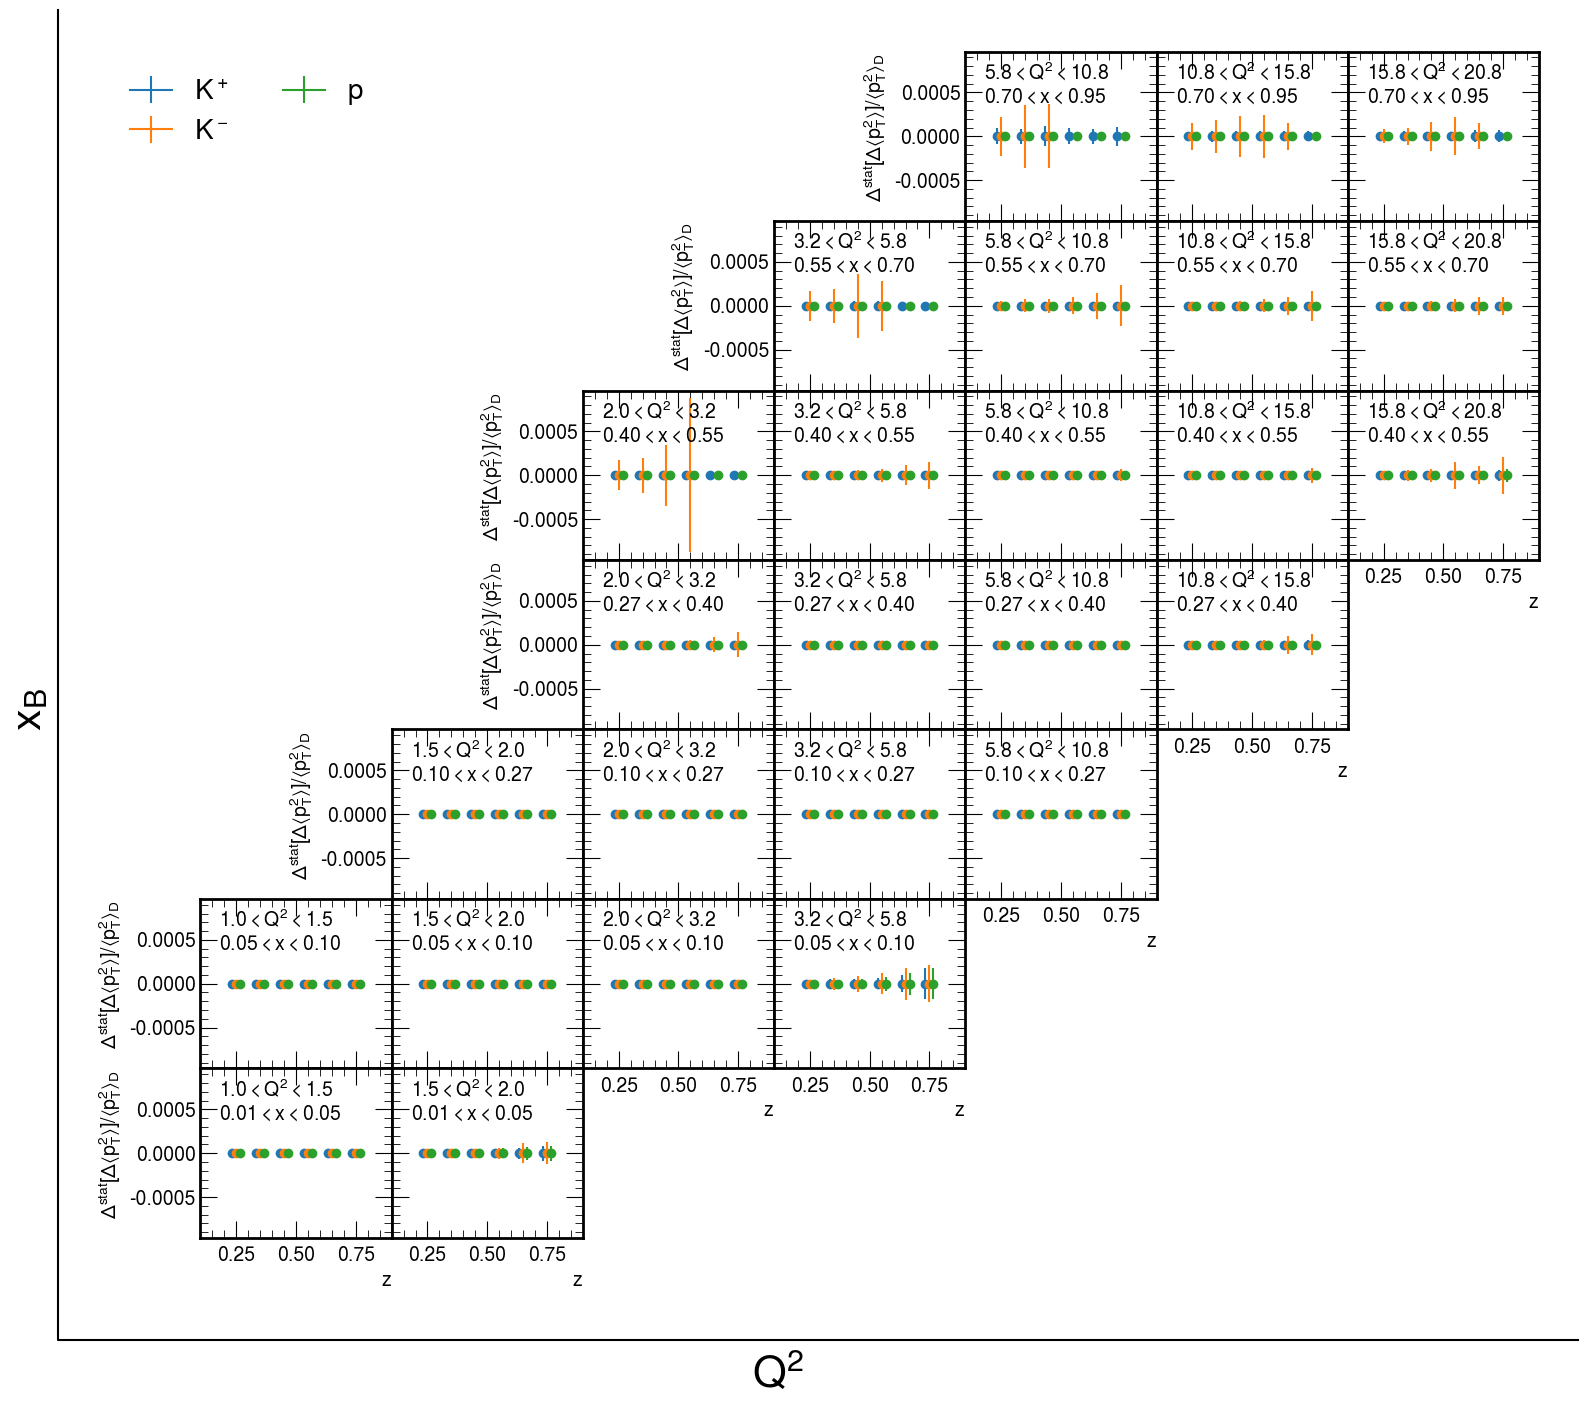

In [406]:
#now make the plots for broadening vs Q2, x, and z:
for statOnly in False, True:
    pid_lists=[[211, -211, 111], [321, -321, 2212]]
    name_lists = [["$\pi^+$", "$\pi^-$", "$\pi^0$"], ["$K^+$", "$K^-$", "$p$"]]
    for pids, names in zip(pid_lists, name_lists):
        def plotstuff(*param):
            plotBroadening(df_hadrons_A, df_hadrons_D,  pids, "z", np.array((0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8)),
                   "$z$", *param,statOnly)
            plt.gca().set_xlim(0.1, 0.9)
        fig, axs = make_x_Q2_panels(plotstuff)

        #create legend
        for pid,name in zip(pids,names):
            axs[0][0].errorbar([],[],[], label=name)
        axs[0][0].legend(fontsize=20, ncol=2)
    plt.show()

<ipython-input-392-edf0e9c57210>:13: RuntimeWarning: invalid value encountered in true_divide
  Rh=hA/hD*singleyieldD/singleyieldA
<ipython-input-392-edf0e9c57210>:14: RuntimeWarning: invalid value encountered in true_divide
  dRh=hA/hD*np.sqrt(1/(hA)+1/(hD))*singleyieldD/singleyieldA
<ipython-input-392-edf0e9c57210>:14: RuntimeWarning: divide by zero encountered in true_divide
  dRh=hA/hD*np.sqrt(1/(hA)+1/(hD))*singleyieldD/singleyieldA
<ipython-input-392-edf0e9c57210>:14: RuntimeWarning: divide by zero encountered in true_divide
  dRh=hA/hD*np.sqrt(1/(hA)+1/(hD))*singleyieldD/singleyieldA
<ipython-input-392-edf0e9c57210>:14: RuntimeWarning: invalid value encountered in multiply
  dRh=hA/hD*np.sqrt(1/(hA)+1/(hD))*singleyieldD/singleyieldA
<ipython-input-392-edf0e9c57210>:13: RuntimeWarning: divide by zero encountered in true_divide
  Rh=hA/hD*singleyieldD/singleyieldA
<ipython-input-392-edf0e9c57210>:13: RuntimeWarning: invalid value encountered in true_divide
  Rh=hA/hD*singleyieldD/

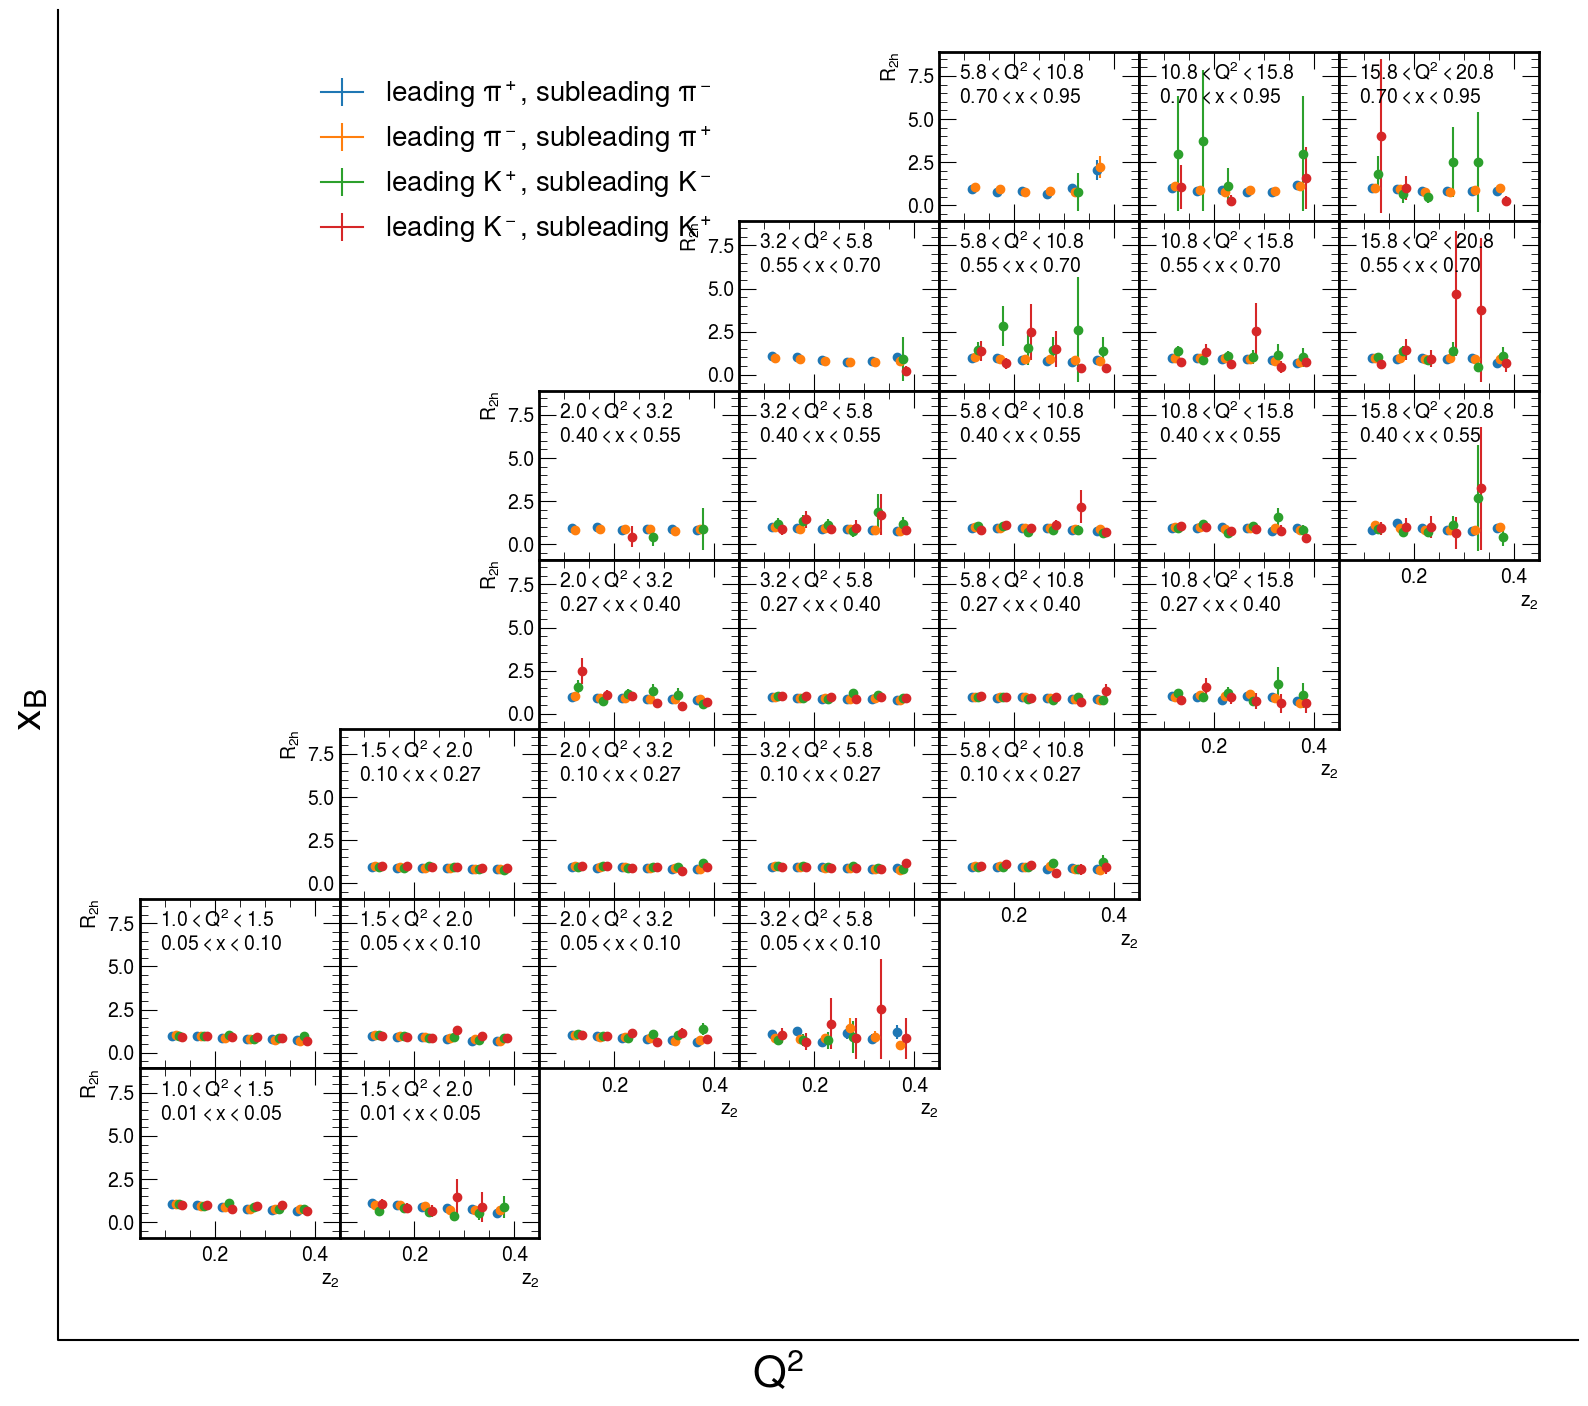

<ipython-input-392-edf0e9c57210>:17: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/(hA*factorA)+1/(hD*factorD))
<ipython-input-392-edf0e9c57210>:17: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/(hA*factorA)+1/(hD*factorD))
<ipython-input-392-edf0e9c57210>:17: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/(hA*factorA)+1/(hD*factorD))
<ipython-input-392-edf0e9c57210>:17: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/(hA*factorA)+1/(hD*factorD))
<ipython-input-392-edf0e9c57210>:17: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/(hA*factorA)+1/(hD*factorD))
<ipython-input-392-edf0e9c57210>:17: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/(hA*factorA)+1/(hD*factorD))
<ipython-input-392-edf0e9c57210>:17: RuntimeWarning: divide by zero encountered in true_divide
  dRh=np.sqrt(1/(hA*factorA)+1/(hD*factorD))
<ipython-input-392-e

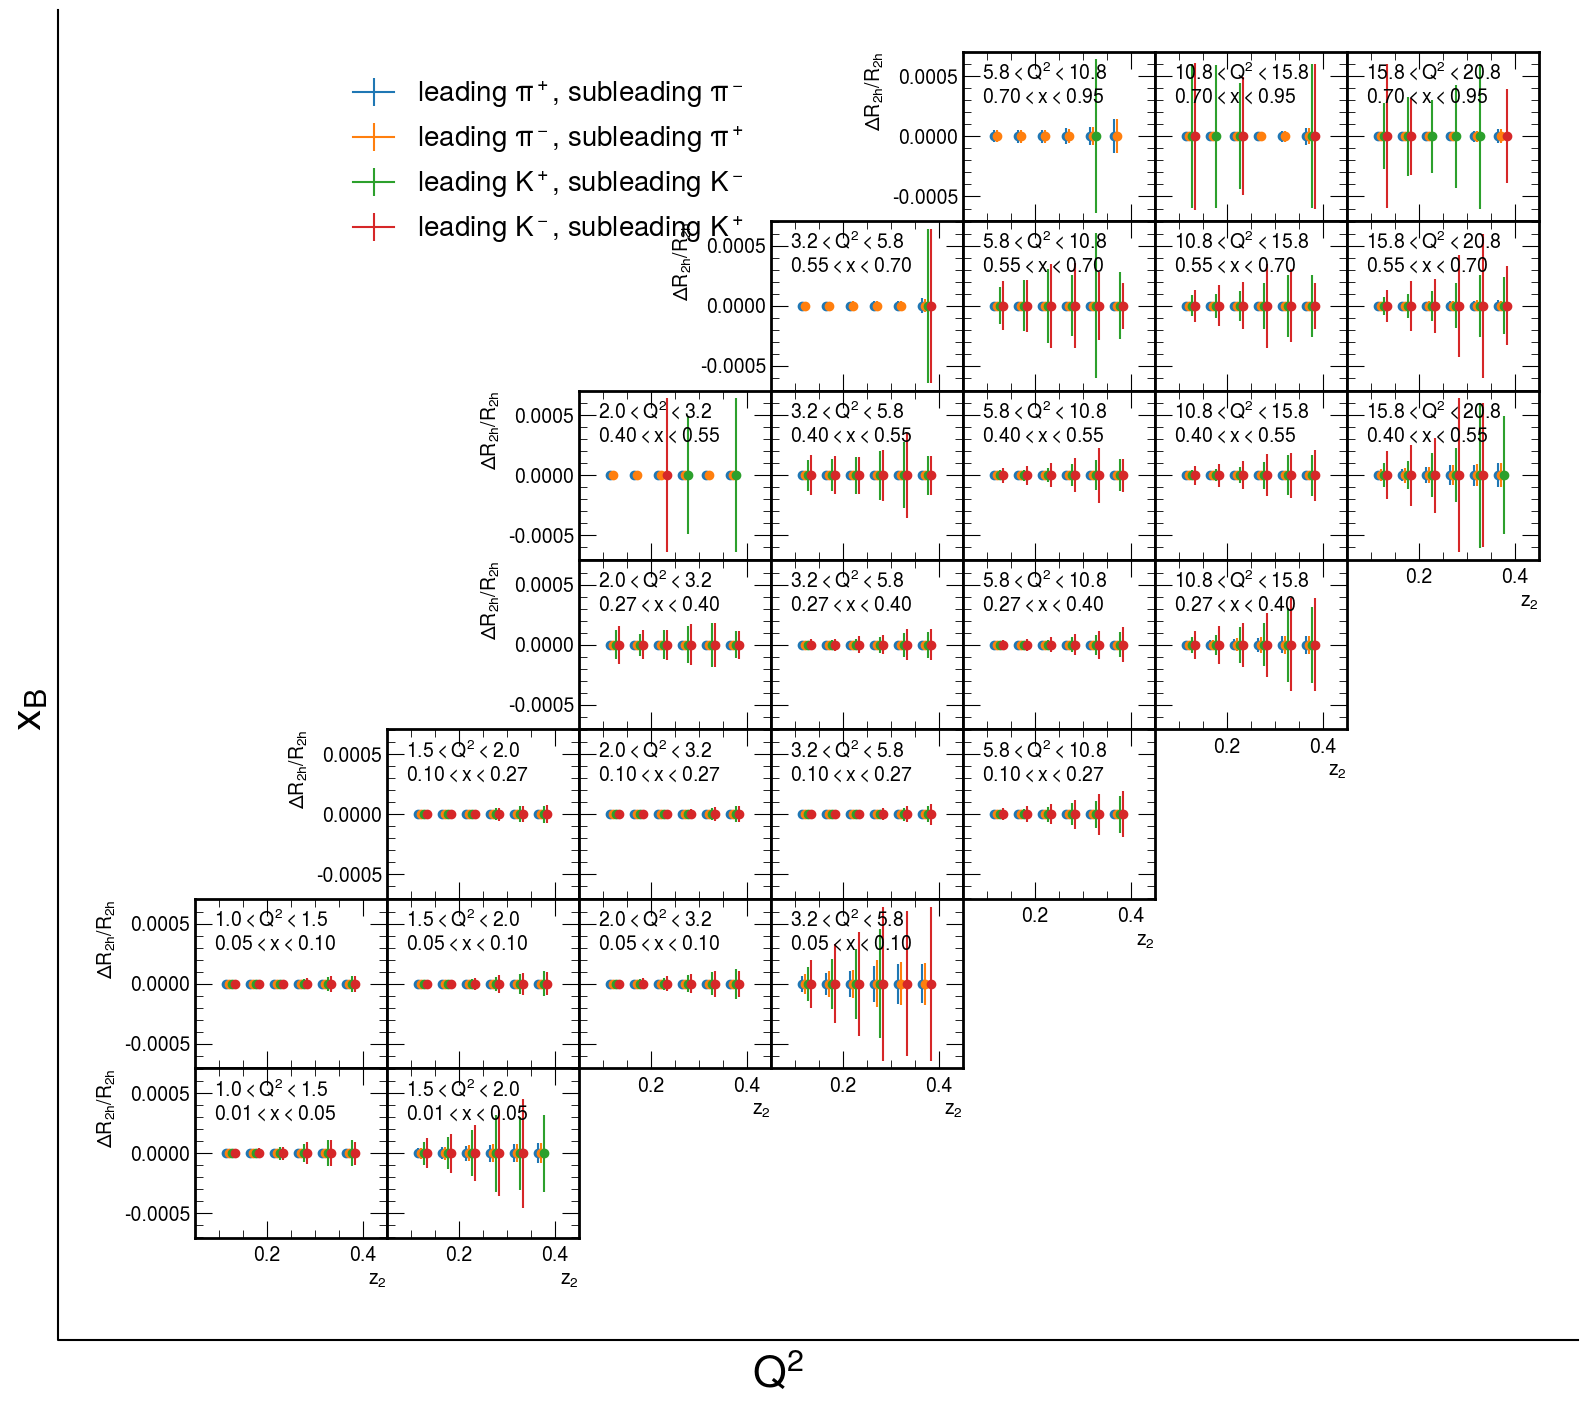

In [394]:
#now make the plots for R2h vs Q2, x, and z2:
for statOnly in False, True:
    pid_lists=[[[211, -211], [-211, 211], [321, -321], [-321, 321] ]]
    name_lists = [["leading $\pi^+$, subleading $\pi^-$", "leading $\pi^-$, subleading $\pi^+$",
                  "leading $K^+$, subleading $K^-$", "leading $K^-$, subleading $K^+$"]]
    pid_lists=[[[211, -211], [-211, 211] ]]
    name_lists = [["leading $\pi^+$, subleading $\pi^-$", "leading $\pi^-$, subleading $\pi^+$"]]
    for pids, names in zip(pid_lists, name_lists):
        def plotstuff(*param):
            plotR2h(df_hadrons_A, df_hadrons_D,  pids,  "z", (0.1, 0.15,0.2,0.25, 0.3, 0.35, 0.4),
                   "$z_2$", *param, statOnly)
            plt.gca().set_xlim(0.05, 0.45)
        fig, axs = make_x_Q2_panels(plotstuff)
        for pid,name in zip(pids,names):
            axs[0][2].errorbar([],[],[], label=name)
        axs[0][2].legend(fontsize=20, ncol=1)
    plt.show()

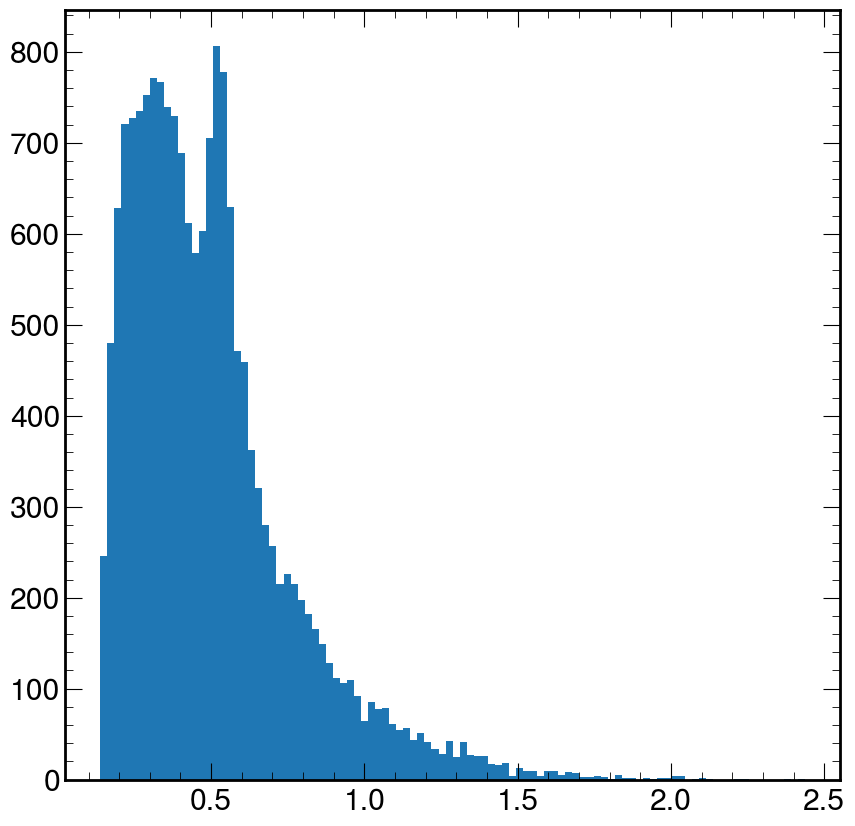

In [419]:
count = 0
K0_cands=[]
for evt in t['D']:
    if count >10000:
        break
    for h1 in range(len(evt.Px)):
        for h2 in range(h1+1, len(evt.Px)):
            m= np.sqrt(evt.E[h1]*evt.E[h2]-evt.Px[h1]*evt.Px[h2]-evt.Py[h1]*evt.Py[h2]-evt.Pz[h1]*evt.Pz[h2])
            pids={evt.barcode[h1],evt.barcode[h2]}
            if pids== {211,-211}:
                K0_cands.append(m)
    count+=1
plt.hist(K0_cands, bins=100)
plt.show()

In [416]:
[a.GetName() for a in t['D'].GetListOfBranches()]

['weight',
 'barcode',
 'Px',
 'Py',
 'Pz',
 'E',
 'evType',
 'nu',
 'Q2',
 'eps',
 'phiL']

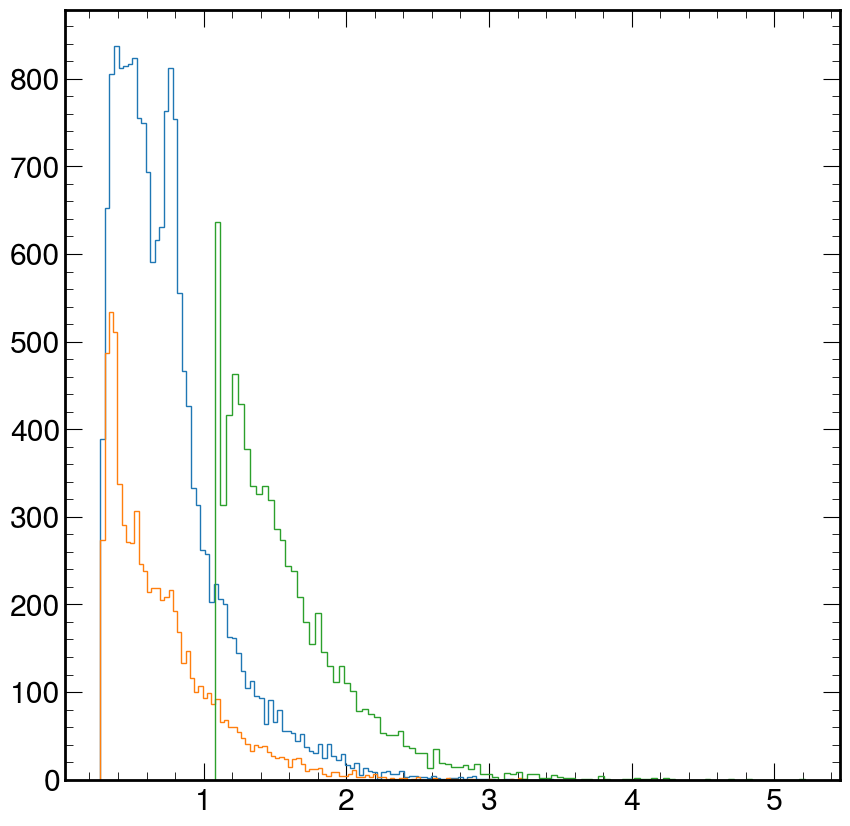

In [434]:
count = 0
cands={"pi+ pi-":[], "pi0 pi0":[], "pi- p":[]}
for evt in t['D']:
    if count >10000:
        break
    for h1 in range(len(evt.Px)):
        #m1=np.sqrt(evt.E[h1]**2-evt.Px[h1]**2-evt.Py[h1]**2-evt.Pz[h1]**2)
        #if evt.barcode[h1]==-211:
            #print(m1)
        for h2 in range(h1+1, len(evt.Px)):
            m= np.sqrt((evt.E[h1]+evt.E[h2])**2-(evt.Px[h1]+evt.Px[h2])**2-(evt.Py[h1]+evt.Py[h2])**2-(evt.Pz[h1]+evt.Pz[h2])**2)
            pids={evt.barcode[h1],evt.barcode[h2]}
            if pids == {211,-211}:
                cands["pi+ pi-"].append(m)
            if pids == {111}:
                cands["pi0 pi0"].append(m)
            if pids == {2212, -211}:
                cands["pi- p"].append(m)
                
    count+=1
for a in cands:
    plt.hist(cands[a], bins=100, label=str(a), histtype='step')
plt.show()

# 1D projection plot

In [12]:

Ebeam=22
Q2min=1;Q2max=100
xmin=0; xmax=1
Mp=.9383
q=f"Q2>{Q2min} && Q2<{Q2max} && Q2/(2*0.9383*nu)>{xmin} && Q2/(2*0.9383*nu)<{xmax} && sqrt(-Q2+{Mp**2}+{2*Mp}*nu)>2 && nu/{Ebeam}<.85"
eRatio=t['C'].GetEntries(q)/t['D'].GetEntries(q)

In [14]:
dfA, dfD =df_hadrons_A, df_hadrons_D

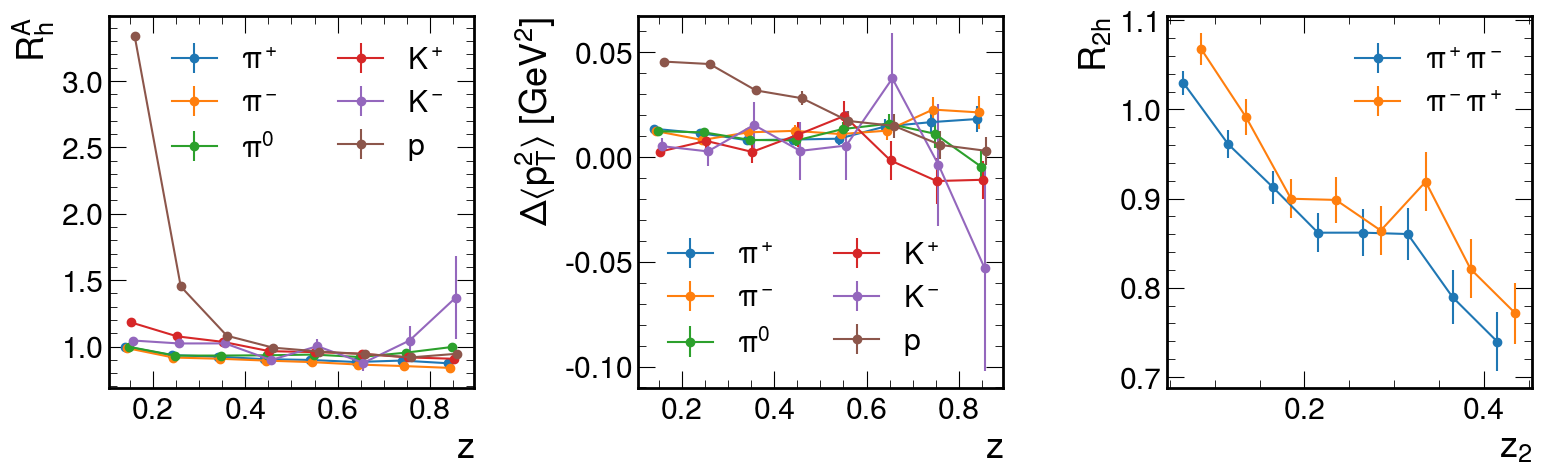

In [28]:

Q2min=3.2;Q2max=5.8
xmin=.27; xmax=.40

fig, axs = plt.subplots(1,3, figsize=(16, 16*1/3))
plt.sca(axs[0])
hvar="z"
binning=np.linspace(.1, .9, 9)
pids=(211, -211, 111, 321, -321, 2212)
names="$\pi^+$", "$\pi^-$", "$\pi^0$","$K^+$", "$K^-$", "$p$", 
for shift, pid, name in zip(np.linspace(-.01,.01, len(pids)),pids, names):
    q=f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax}"
    dfAq=dfA.query(q)
    dfDq=dfD.query(q)
    hA,x = np.histogram(dfAq.eval(hvar), bins=binning)
    hD,_ = np.histogram(dfDq.eval(hvar), bins=binning)
    Rh=hA/hD/eRatio
    dRh=hA/hD*np.sqrt(1/hA+1/hD)/eRatio
    x=(x[1:]+x[:-1])/2+shift
    plt.errorbar(x, Rh,dRh, label=name, marker='o')
plt.xlabel("$z$")
plt.ylabel("$R^A_h$")

plt.legend(ncol=2)
plt.sca(axs[1])
hvar="z"
binning=np.linspace(.1, .9, 9)

pids=(211, -211, 111, 321, -321, 2212)
names="$\pi^+$", "$\pi^-$", "$\pi^0$","$K^+$", "$K^-$", "$p$", 
for shift, pid, name in zip(np.linspace(-.01,.01, len(pids)),pids, names):
    q=f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax}"
    dfAq=dfA.query(q)
    dfDq=dfD.query(q)
    bincenters=[]
    broadenings=[]
    dbroadenings=[]
    hA=[]
    hD=[]
    for i in range(len(binning)-1):
        qbin=f"{hvar}>{binning[i]} and {hvar}<{binning[i+1]}"
        pT2A=dfAq.query(qbin).eval("pT2")
        pT2D=dfDq.query(qbin).eval("pT2")
        hA.append(len(pT2A))
        hD.append(len(pT2D))
        broadenings.append(np.mean(pT2A)-np.mean(pT2D))
        dA=np.std(pT2A)/np.sqrt(len(pT2A))
        dD=np.std(pT2D)/np.sqrt(len(pT2D))
        dbroadenings.append(np.hypot(dA,dD))
        bincenters.append((binning[i]+binning[i+1])/2+shift)
    plt.errorbar(bincenters, broadenings,dbroadenings, label=name, marker='o')
    
plt.xlabel("$z$")
plt.ylabel("$\Delta\\langle p^2_T\\rangle$ [GeV$^2$]")
plt.legend(ncol=2)
plt.sca(axs[2])

binning=np.linspace(.05, .45, 9)
for shift, pid, name in (-.01, 211, "$\pi^+\pi^-$"), (0.01, -211, "$\pi^-\pi^+$"):
    q=f"pid=={-pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and leading_z>0.5 and leading_pid=={pid}"
    dfAq=dfA.query(q)
    dfDq=dfD.query(q)
    hA,x = np.histogram(dfAq.eval(hvar), bins=binning)
    hD,_ = np.histogram(dfDq.eval(hvar), bins=binning)

    singleyieldA=len(dfA.query(f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and z>0.5"))
    singleyieldD=len(dfD.query(f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and z>0.5"))

    R2h=hA/hD*singleyieldD/singleyieldA
    dR2h=hA/hD*np.sqrt(1/(hA)+1/(hD))*singleyieldD/singleyieldA
    x=(x[1:]+x[:-1])/2
    plt.errorbar(x+shift, R2h,dR2h, label=name, marker='o')
plt.xlabel("$z_2$")
plt.ylabel("$R_{2h}$")
plt.legend()
plt.tight_layout()
plt.savefig("1bin_projections_22GeV.pdf")
plt.show()

In [31]:
dfA.pT2.quantile(0.4), dfA.pT2.quantile(0.6)

(0.08102201594378798, 0.1725952881095241)

In [58]:


print(factorA, factorD)

14764388.987145914 2924152.9331984064


In [68]:

Q2min=3.2;Q2max=5.8
xmin=.27; xmax=.40
pT2min=.08; pT2max=0.17
phimin=3/8*np.pi; phimax=4/8*np.pi

fig, axs = plt.subplots(2,3, figsize=(16, 16*2/3), sharey='col', sharex='col')
for row in 0, 1:
    
    #fA=0; fD=0
    if row == 0:
        dfA, dfD =df_hadrons_A, df_hadrons_D
        tC, tD=t['C'], t['D']
        lumi = 8.6e11 # mub^-1, corresponding to 100 PAC days at 10^35 cm^-2 s^-1
        sigma_C_22GeV=206 #mub
        factorA = lumi*sigma_C_22GeV/tC.GetEntries()
        sigma_D_22GeV=34 #mub
        factorD = lumi*sigma_D_22GeV/tD.GetEntries()
        fA=factorA
        fD=factorD
        print(fA,fD)
    elif row == 1:
        dfA, dfD =df_hadrons_A_10pt6, df_hadrons_D_10pt6
        tC, tD=t['C_10pt6GeV'], t['D_10pt6GeV']
        lumi = 8.6e11/100 # mub^-1, corresponding to 1 PAC days at 10^35 cm^-2 s^-1
        
        sigma_C_22GeV=206 #mub
        factorA = lumi*sigma_C_22GeV/tC.GetEntries()
        sigma_D_22GeV=34 #mub
        factorD = lumi*sigma_D_22GeV/tD.GetEntries()
        fA=factorA
        fD=factorD
        print(fA,fD)
    q=f"Q2>{Q2min} && Q2<{Q2max} && Q2/(2*0.9383*nu)>{xmin} && Q2/(2*0.9383*nu)<{xmax} && sqrt(-Q2+{Mp**2}+{2*Mp}*nu)>2 && nu/{Ebeam}<.85"
    eRatio=tC.GetEntries(q)/tD.GetEntries(q)
    plt.sca(axs[row][0])
    hvar="z"
    binning=np.linspace(.1, .8, 8)
    pids=(211, -211, 111, 321, -321, 2212)
    names="$\pi^+$", "$\pi^-$", "$\pi^0$","$K^+$", "$K^-$", "$p$", 
    for shift, pid, name in zip(np.linspace(-.01,.01, len(pids)),pids, names):
        q=f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and pT2>{pT2min} and pT2<{pT2max}"
        q+=f" and phi>{phimin} and phi<{phimax}"
        dfAq=dfA.query(q)
        dfDq=dfD.query(q)
        hA,x = np.histogram(dfAq.eval(hvar), bins=binning)
        hD,_ = np.histogram(dfDq.eval(hvar), bins=binning)
        Rh=hA/hD/eRatio
        dRh=hA/hD*np.sqrt(1/hA/fA+1/hD/fD)/eRatio
        x=(x[1:]+x[:-1])/2+shift
        plt.errorbar(x, Rh,dRh, label=name, marker='o')
    if row==0:
        plt.title(f"${xmin}<x<{xmax}$;  ${Q2min}<Q^2<{Q2max}$ GeV$^2$\n${pT2min}<p_T^2<{pT2max:.2f}$ GeV;  ${phimin:.2f}<\phi<{phimax:.2f}$ rad",
             fontsize=16)
    plt.xlabel("$z$")
    plt.ylabel("$R^A_h$")

    plt.legend(ncol=2)
    plt.sca(axs[row][1])
    hvar="z"
    binning=np.linspace(.1, .8, 8)

    pids=(211, -211, 111, 321, -321, 2212)
    names="$\pi^+$", "$\pi^-$", "$\pi^0$","$K^+$", "$K^-$", "$p$", 
    for shift, pid, name in zip(np.linspace(-.01,.01, len(pids)),pids, names):
        q=f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax}"
        q+=f" and phi>{phimin} and phi<{phimax}"
        dfAq=dfA.query(q)
        dfDq=dfD.query(q)
        bincenters=[]
        broadenings=[]
        dbroadenings=[]
        hA=[]
        hD=[]
        for i in range(len(binning)-1):
            qbin=f"{hvar}>{binning[i]} and {hvar}<{binning[i+1]}"
            pT2A=dfAq.query(qbin).eval("pT2")
            pT2D=dfDq.query(qbin).eval("pT2")
            hA.append(len(pT2A))
            hD.append(len(pT2D))
            broadenings.append(np.mean(pT2A)-np.mean(pT2D))
            dA=np.std(pT2A)/np.sqrt(len(pT2A)*fA)
            dD=np.std(pT2D)/np.sqrt(len(pT2D)*fD)
            dbroadenings.append(np.hypot(dA,dD))
            bincenters.append((binning[i]+binning[i+1])/2+shift)
        plt.errorbar(bincenters, broadenings,dbroadenings, label=name, marker='o')

    plt.xlabel("$z$")
    plt.ylabel("$\Delta\\langle p^2_T\\rangle$ [GeV$^2$]")
    if row==0:
        plt.title(f"${xmin}<x<{xmax}$;  ${Q2min}<Q^2<{Q2max}$ GeV$^2$\n${phimin:.2f}<\phi<{phimax:.2f}$ rad",
             fontsize=16)
    plt.legend(ncol=2)
    plt.sca(axs[row][2])

    binning=np.linspace(.05, .45, 9)
    for shift, pid, name in (-.01, 211, "$\pi^+\pi^-$"), (0.01, -211, "$\pi^-\pi^+$"):
        q=f"pid=={-pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and leading_z>0.5 and leading_pid=={pid}"
        q+=f" and phi>{phimin} and phi<{phimax} and leading_phi>{phimin+np.pi} and leading_phi<{phimax+np.pi}"
        dfAq=dfA.query(q)
        dfDq=dfD.query(q)
        hA,x = np.histogram(dfAq.eval(hvar), bins=binning)
        hD,_ = np.histogram(dfDq.eval(hvar), bins=binning)

        singleyieldA=len(dfA.query(f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and z>0.5"))
        singleyieldD=len(dfD.query(f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and z>0.5"))

        R2h=hA/hD*singleyieldD/singleyieldA
        dR2h=hA/hD*np.sqrt(1/(hA*fA)+1/(hD*fD))*singleyieldD/singleyieldA
        x=(x[1:]+x[:-1])/2
        plt.errorbar(x+shift, R2h,dR2h, label=name, marker='o')
    plt.xlabel("$z_2$")
    plt.ylabel("$R_{2h}$")
    if row==0:
        plt.title(f"${xmin}<x<{xmax}$;  ${Q2min}<Q^2<{Q2max}$ GeV$^2$",
             fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.savefig("1bin_projections_22GeV.pdf")
plt.show()

14764388.987145914 2924152.9331984064


<ipython-input-68-7dc934ce9900>:107: RuntimeWarning: invalid value encountered in true_divide
  R2h=hA/hD*singleyieldD/singleyieldA
<ipython-input-68-7dc934ce9900>:108: RuntimeWarning: invalid value encountered in true_divide
  dR2h=hA/hD*np.sqrt(1/(hA*fA)+1/(hD*fD))*singleyieldD/singleyieldA
<ipython-input-68-7dc934ce9900>:108: RuntimeWarning: divide by zero encountered in true_divide
  dR2h=hA/hD*np.sqrt(1/(hA*fA)+1/(hD*fD))*singleyieldD/singleyieldA
/home/sebouh/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
<ipython-input-68-7dc934ce9900>:107: RuntimeWarning: invalid value encountered in true_divide
  R2h=hA/hD*singleyieldD/singleyieldA
<ipython-input-68-7dc934ce9900>:108: RuntimeWarning: invalid value encountered in true_divide
  dR2h=hA/hD*np.sqrt(1/(hA*fA)+1/(hD*fD))*singleyieldD/singleyieldA
<ipython-input-68-7dc934ce9900>:108: RuntimeWarning: divide by zero encountered in true_

147650.9530137263 29242.704950207895


<ipython-input-68-7dc934ce9900>:107: RuntimeWarning: invalid value encountered in true_divide
  R2h=hA/hD*singleyieldD/singleyieldA
<ipython-input-68-7dc934ce9900>:108: RuntimeWarning: invalid value encountered in true_divide
  dR2h=hA/hD*np.sqrt(1/(hA*fA)+1/(hD*fD))*singleyieldD/singleyieldA
<ipython-input-68-7dc934ce9900>:108: RuntimeWarning: divide by zero encountered in true_divide
  dR2h=hA/hD*np.sqrt(1/(hA*fA)+1/(hD*fD))*singleyieldD/singleyieldA
/home/sebouh/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
<ipython-input-68-7dc934ce9900>:107: RuntimeWarning: invalid value encountered in true_divide
  R2h=hA/hD*singleyieldD/singleyieldA
<ipython-input-68-7dc934ce9900>:108: RuntimeWarning: invalid value encountered in true_divide
  dR2h=hA/hD*np.sqrt(1/(hA*fA)+1/(hD*fD))*singleyieldD/singleyieldA
<ipython-input-68-7dc934ce9900>:108: RuntimeWarning: divide by zero encountered in true_

KeyboardInterrupt: 

In [117]:
# Q2_partitions = (1.0, 1.5, 2, 3.2, 5.8, 10.8, 19.5, 20.8)
# x_partitions = (.01, .05, .1, .27, .40, .55, .70, .95)
# bins_used = [[True, True, False, False, False, False, False],
#             [True, True, True, True, False, False, False],
#             [False, True, True, True, True, False, False],
#             [False, False, True, True, True, True, False],
#             [False, False, True, True, True, True, True],
#             [False, False, False, True, True, True, True],
#             [False, False, False, False, True, True, True]]

Q2_partitions = (3.0, 5.5, 9.3, 14.5, 22, 31)
x_partitions = (.07,.16, .27, .40, .55, .75, .95)
bins_used = [[True, False, False, False, False],
             [True, True, False, False, False],
            [True, True, True, False, False],
            [True, True, True, True, False],
            [True, True, True, True, True],
            [False, False, True, True, True],
            [False, False, True, True, True]]

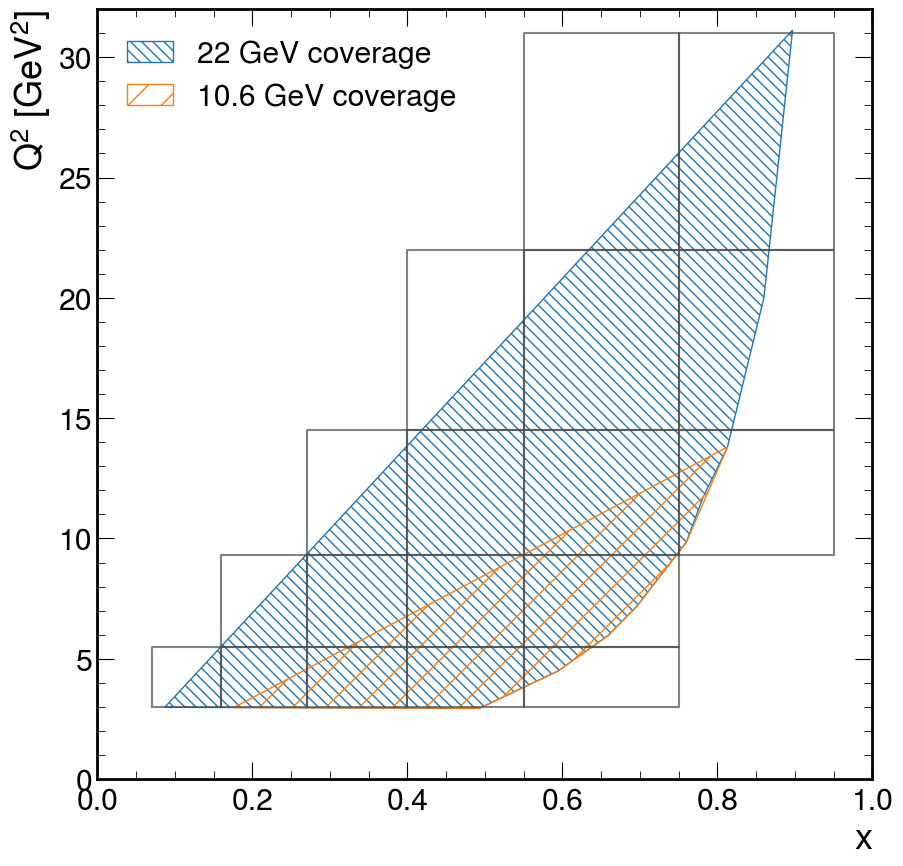

In [133]:
import matplotlib as mpl
N=30000
#plt.scatter(df_hadrons_A.query("Q2>3").Q2[:N], df_hadrons_A.query("Q2>3").x[:N],s=1, color='tab:orange')
#plt.scatter(df_hadrons_A_10pt6.query("Q2>3")[:N].Q2, df_hadrons_A_10pt6.query("Q2>3")[:N].x,s=1, color='tab:blue')



plt.ylabel("$Q^2$ [GeV$^2$]")
plt.xlabel("x")
#dummy artists for the plot
import matplotlib.patches as patches
xy1=((2.986,0.087),
    (31.128,0.897),
    #(31.128,0.880),
    (20.,0.86),
    (13.801,0.813),
    (11.675,0.781),
    (9.852,0.760),
    (7.182,0.696),
    (5.970,0.659),
    (4.486,0.594),
    (2.945,0.493))
xy2=((2.977,0.176),
    (13.801,0.813),
    (9.852,0.760),
    (7.182,0.696),
    (5.970,0.659),
    (4.486,0.594),
    (2.945,0.493))

xy1=[(y,x) for (x,y) in xy1]
xy2=[(y,x) for (x,y) in xy2]

plt.gca().add_patch(patches.Polygon(xy1, color='tab:blue', label="22 GeV coverage", fill=False, hatch="\\\\\\"))
plt.gca().add_patch(patches.Polygon(xy2,  color='tab:orange', label="10.6 GeV coverage", fill=False, hatch="/"))
plt.legend(loc='upper left')
plt.ylim(0, 32)
plt.xlim(0, 1)
plt.savefig("coverage.pdf")
#plt.show()
for i in range(len(Q2_partitions)-1):
    for j in range(len(x_partitions)-1):
        if not bins_used[j][i]:
            continue
        Q2min,Q2max=Q2_partitions[i:i+2]
        xmin,xmax=x_partitions[j:j+2]
        plt.plot((xmin,xmin, xmax, xmax, xmin),(Q2min,Q2max, Q2max, Q2min, Q2min), linestyle='-', color='0.3', alpha=0.7)


plt.savefig("bins.pdf")
plt.show()

In [119]:
#example to save part of a plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.transforms import Bbox

def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
#    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(1.0 + pad, 1.0 + pad)

# Make an example plot with two subplots...
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(range(10), 'b-')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(range(20), 'r^')

# Save the full figure...
fig.savefig('full_figure.png')

# Save just the portion _inside_ the second axis's boundaries
extent = full_extent(ax2).transformed(fig.dpi_scale_trans.inverted())
# Alternatively,
# extent = ax.get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax2_figure.png', bbox_inches=extent)

making plots
2214658.348071887 438622.93997976097


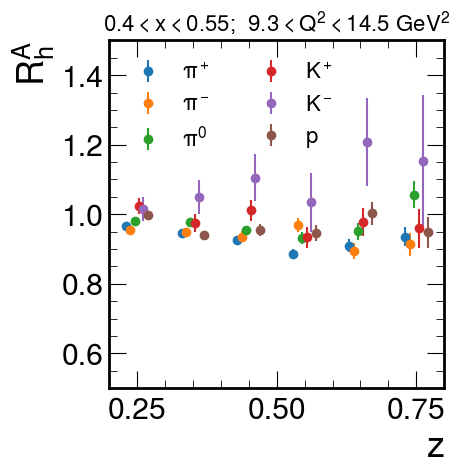

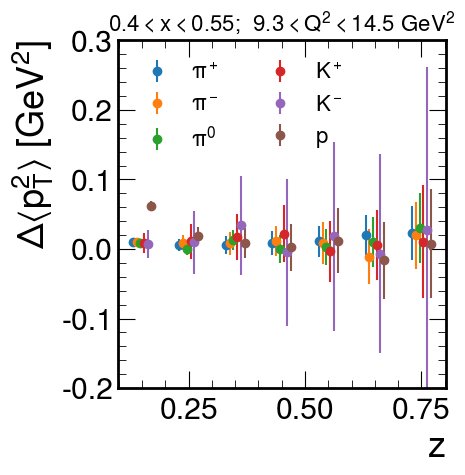

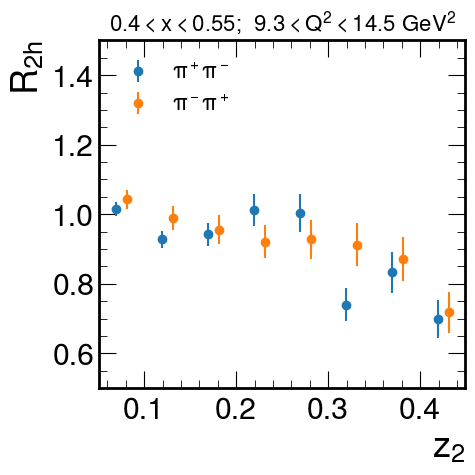

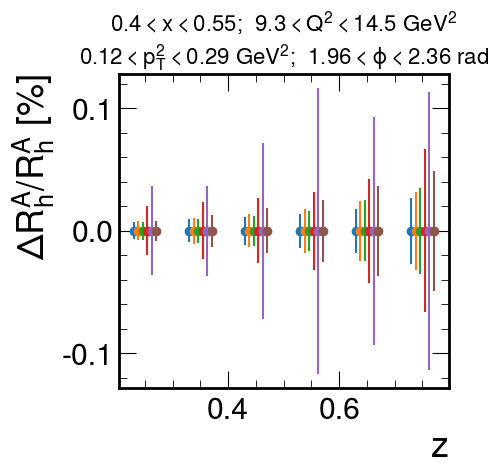

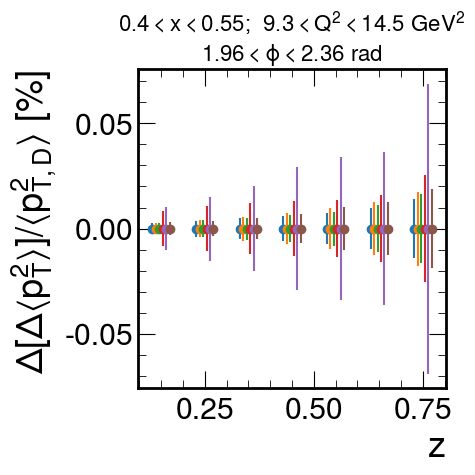

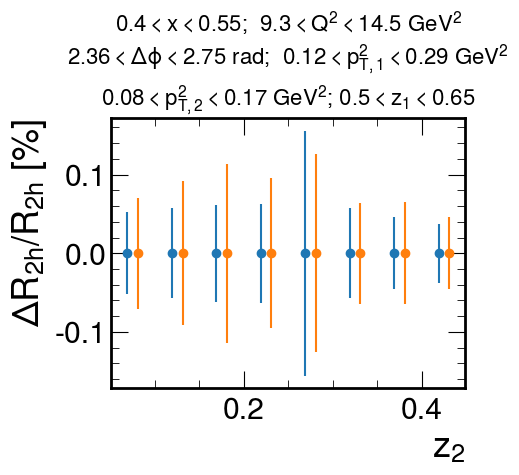

2214658.348071887 438622.93997976097


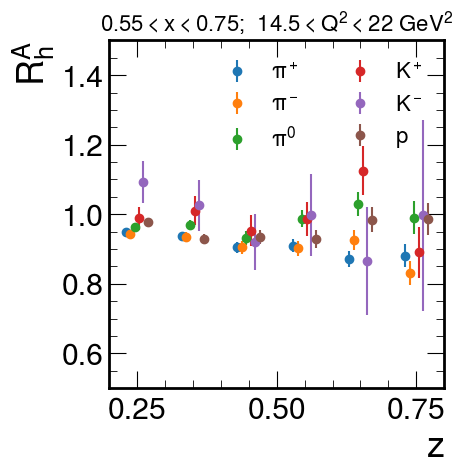

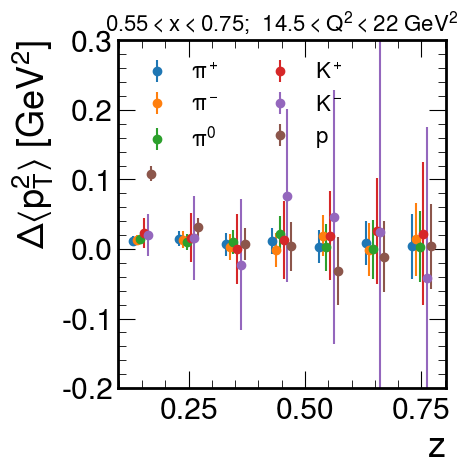

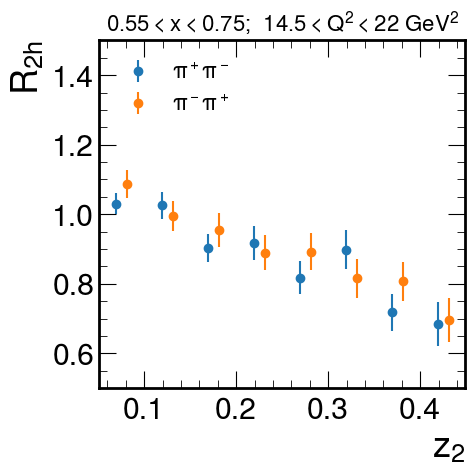

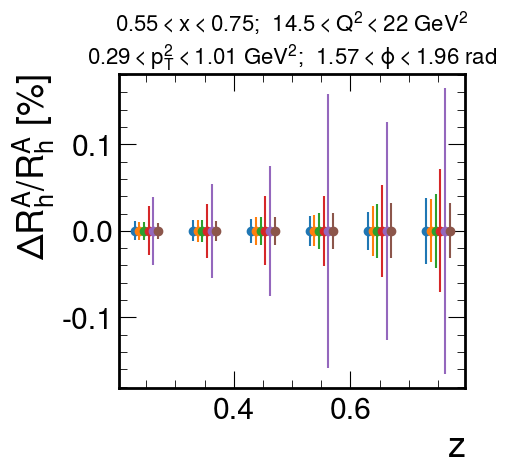

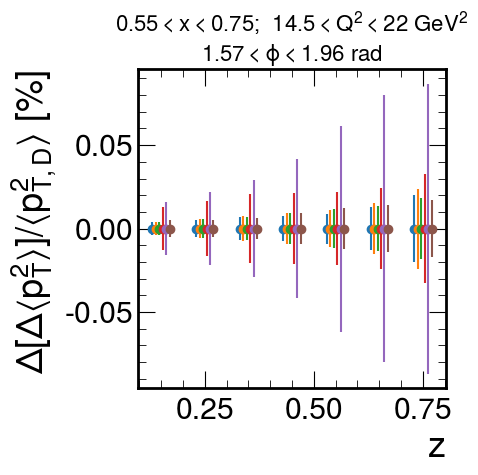

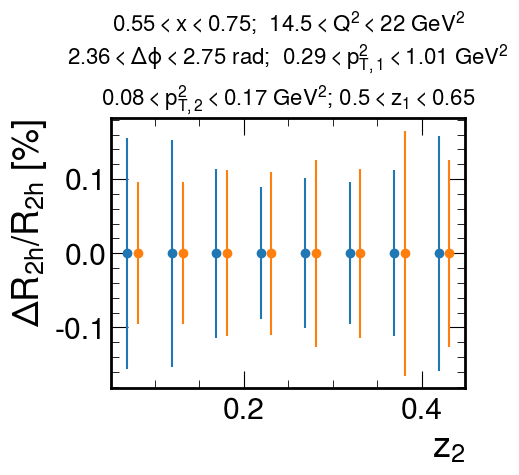

2214658.348071887 438622.93997976097


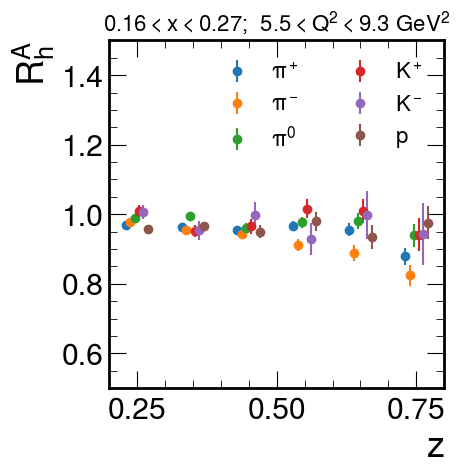

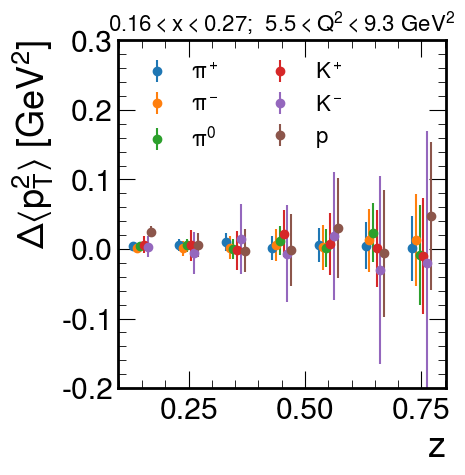

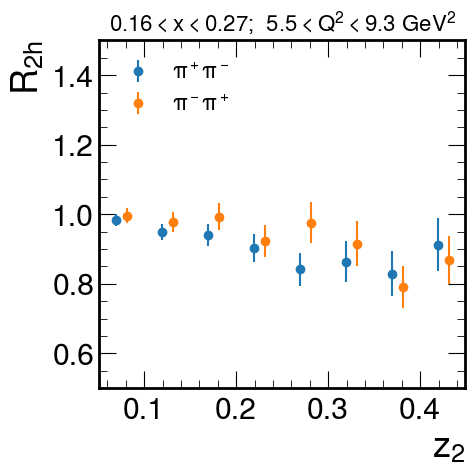

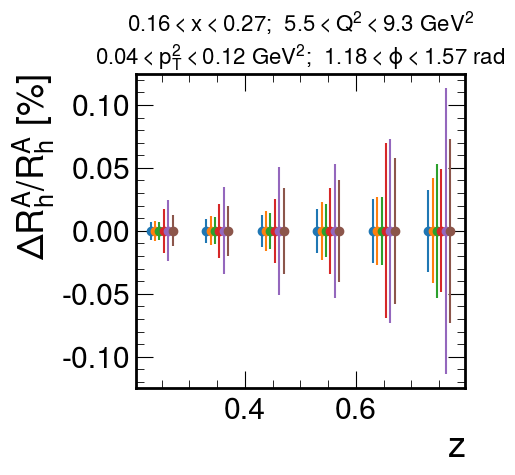

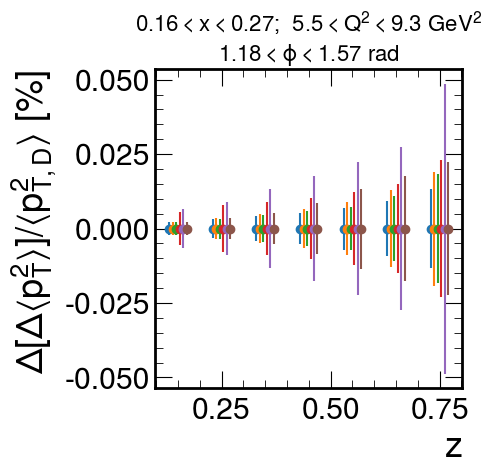

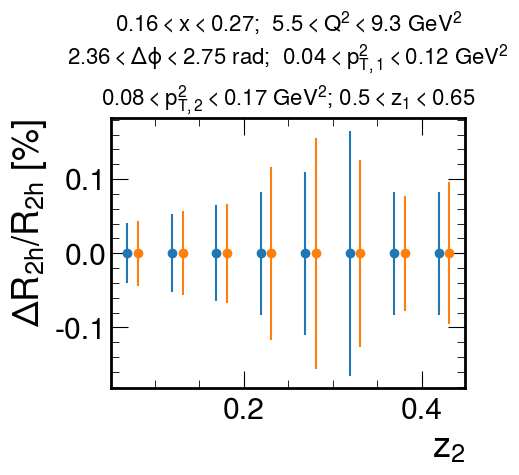

In [134]:
print('making plots')
#Q2min=3.2;Q2max=5.8
#xmin=.27; xmax=.40
Mp=.9383

# Q2min, Q2max=7.8, 12.8
# xmin, xmax=.4, .55
# pT2min=.08; pT2max=0.17
# phimin=3/8*np.pi; phimax=4/8*np.pi

pT2bins=[dfD.pT2.quantile(i/4) for i in (0, 1, 2,3,3.9)]

for bini in range(3):
    if bini == 0:
        #Q2min, Q2max=9, 12.8
        #xmin, xmax=.4, .55
        Q2min, Q2max=Q2_partitions[2:4]
        xmin, xmax=x_partitions[3:5]
        pT2min,pT2max=pT2bins[2:4]
        phimin=5/8*np.pi; phimax=6/8*np.pi
    elif bini==1:
        Q2min, Q2max=Q2_partitions[3:5]
        xmin, xmax=x_partitions[4:6]
        pT2min,pT2max=pT2bins[3:5]
        phimin=4/8*np.pi; phimax=5/8*np.pi
    elif bini==2:
        Q2min, Q2max=Q2_partitions[1:3]
        xmin, xmax=x_partitions[1:3]
        pT2min,pT2max=pT2bins[1:3]
        phimin=3/8*np.pi; phimax=4/8*np.pi
    def aaa(x):
        return x+(x==0)

    #fig, axs = plt.subplots(2,3, figsize=(16, 16*2/3), sharex='col')
    axs=[[0,0,0], [0,0,0]]
    for i in range(0,2):
        for j in range(0,3):
            fig, axs[i][j]= plt.subplots(1,1, figsize=(16/3, 16*2/3/2), sharex='col')
    for row in 0,:

        #fA=0; fD=0

        if row == 0:
            Ebeam=22
            dfA, dfD =df_hadrons_A, df_hadrons_D
            tC, tD=t['C'], t['D']
            lumi = 8.6e11*.15 # mub^-1, corresponding to 100 PAC days at 10^35 cm^-2 s^-1
            sigma_C_22GeV=206 #mub
            factorA = lumi*sigma_C_22GeV/tC.GetEntries()
            sigma_D_22GeV=34 #mub
            factorD = lumi*sigma_D_22GeV/tD.GetEntries()
            fA=factorA
            fD=factorD
            print(fA,fD)
        elif row == 1:
            Ebeam=10.6
            dfA, dfD =df_hadrons_A_10pt6, df_hadrons_D_10pt6
            tC, tD=t['C_10pt6GeV'], t['D_10pt6GeV']
            lumi = 8.6e11*.6 # mub^-1, corresponding to 100 PAC days at 10^35 cm^-2 s^-1

            sigma_C_22GeV=206 #mub
            factorA = lumi*sigma_C_22GeV/tC.GetEntries()
            sigma_D_22GeV=34 #mub
            factorD = lumi*sigma_D_22GeV/tD.GetEntries()
            fA=factorA
            fD=factorD
            print(fA,fD)
        q=f"Q2>{Q2min} && Q2<{Q2max} && Q2/(2*0.9383*nu)>{xmin} && Q2/(2*0.9383*nu)<{xmax} && sqrt(-Q2+{Mp**2}+{2*Mp}*nu)>2 && nu/{Ebeam}<.85"
        eRatio=tC.GetEntries(q)/tD.GetEntries(q)
        plt.sca(axs[0][0])
        hvar="z"
        binning=np.linspace(.2, .8, 7)
        pids=(211, -211, 111, 321, -321, 2212)
        names="$\pi^+$", "$\pi^-$", "$\pi^0$","$K^+$", "$K^-$", "$p$", 
        for shift, pid, name in zip(np.linspace(-.02,.02, len(pids)),pids, names):
            q=f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax}"
            #q+=f" and pT2>{pT2min} and pT2<{pT2max} and phi>{phimin} and phi<{phimax}"
            dfAq=dfA.query(q)
            dfDq=dfD.query(q)
            hA,x = np.histogram(dfAq.eval(hvar), bins=binning)
            hD,_ = np.histogram(dfDq.eval(hvar), bins=binning)
            x=(x[1:]+x[:-1])/2+shift
            Rh=hA/hD/eRatio
            dRh=Rh*np.sqrt(1/aaa(hA)+1/aaa(hD))
            axs[0][0].errorbar(x, Rh,dRh, label=name, marker='o', linestyle='')
            q+=f" and pT2>{pT2min} and pT2<{pT2max} and phi>{phimin} and phi<{phimax}"
            dfAq=dfA.query(q)
            dfDq=dfD.query(q)

            hA,_ = np.histogram(dfAq.eval(hvar), bins=binning)
            hD,_ = np.histogram(dfDq.eval(hvar), bins=binning)

            dRh=Rh*np.sqrt(1/aaa(hA)/fA+1/aaa(hD)/fD)
            #x=(x[1:]+x[:-1])/2+shift
            axs[1][0].errorbar(x, [0]*len(x),dRh/Rh*100, label=name, marker='o', linestyle='')

        axs[0][0].set_title(f"${xmin}<x<{xmax}$;  ${Q2min}<Q^2<{Q2max}$ GeV$^2$",
                 fontsize=16)
        axs[1][0].set_title(f"${xmin}<x<{xmax}$;  ${Q2min}<Q^2<{Q2max}$ GeV$^2$\n${pT2min:.2f}<p_T^2<{pT2max:.2f}$ GeV$^2$;  ${phimin:.2f}<\phi<{phimax:.2f}$ rad",
                 fontsize=16)

        axs[0][0].set_xlabel("$z$")
        axs[0][0].legend(ncol=2,fontsize=16)
        axs[0][0].set_ylabel("$R^A_h$")
        axs[1][0].set_ylabel("$\Delta R^A_h/R^A_h$ [%]")
        axs[1][0].set_xlabel("$z$")

        plt.sca(axs[1][0])
        hvar="z"
        binning=np.linspace(.1, .8, 8)

        pids=(211, -211, 111, 321, -321, 2212)
        names="$\pi^+$", "$\pi^-$", "$\pi^0$","$K^+$", "$K^-$", "$p$", 
        for shift, pid, name in zip(np.linspace(-.02,.02, len(pids)),pids, names):
            q=f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax}"
            dfAq=dfA.query(q)
            dfDq=dfD.query(q)
            bincenters=[]
            broadenings=[]
            dbroadenings=[]
            dbroadenings1=[]
            hA=[]
            hD=[]
            pT2Ds=[]
            for i in range(len(binning)-1):
                qbin=f"{hvar}>{binning[i]} and {hvar}<{binning[i+1]}"
                pT2A=dfAq.query(qbin).eval("pT2")
                pT2D=dfDq.query(qbin).eval("pT2")
                pT2Ds.append(np.mean(pT2D))
                hA.append(len(pT2A))
                hD.append(len(pT2D))
                broadenings.append(np.mean(pT2A)-np.mean(pT2D))

                qphi =f"phi>{phimin} and phi<{phimax}"

                dA=np.std(pT2A)/np.sqrt(aaa(len(dfAq.query(qbin+" and " +qphi)))*fA)
                dD=np.std(pT2D)/np.sqrt(aaa(len(dfAq.query(qbin+" and " +qphi)))*fD)
                dbroadenings1.append(np.hypot(dA,dD))

                dA=np.std(pT2A)/np.sqrt(aaa(len(dfAq.query(qbin+" and " +qphi))))
                dD=np.std(pT2D)/np.sqrt(aaa(len(dfAq.query(qbin+" and " +qphi))))
                dbroadenings.append(np.hypot(dA,dD))

                bincenters.append((binning[i]+binning[i+1])/2+shift)
            axs[0][1].errorbar(bincenters, broadenings,dbroadenings, label=name, marker='o', linestyle='')
            dy=np.array(dbroadenings1)/np.array(pT2Ds)
            y=np.zeros(len(broadenings))
            axs[1][1].errorbar(bincenters, y,dy*100, label=name, marker='o', linestyle='')
        axs[0][0].set_xlim(0.2,0.8)
        axs[0][1].set_title(f"${xmin}<x<{xmax}$;  ${Q2min}<Q^2<{Q2max}$ GeV$^2$",
                 fontsize=16)
        axs[1][1].set_title(f"${xmin}<x<{xmax}$;  ${Q2min}<Q^2<{Q2max}$ GeV$^2$\n${phimin:.2f}<\phi<{phimax:.2f}$ rad",
                 fontsize=16)
        axs[0][1].set_xlabel("$z$")
        axs[0][1].set_ylabel("$\Delta\\langle p^2_T\\rangle$ [GeV$^2$]")
        axs[1][1].set_ylabel("$\Delta [\Delta\\langle p^2_T\\rangle]/\\langle p^2_{T,D}\\rangle$ [%]")
        axs[1][1].set_xlabel("$z$")

        axs[0][1].legend(ncol=2,fontsize=16, loc='upper left')
        plt.sca(axs[0][2])

        binning=np.linspace(.05, .45, 9)
        z1min=0.5; z1max=0.65
        #phi1min=0; phi1max=np.pi/4
        
        if bini==0:
            pT2min_lead,pT2max_lead=pT2bins[2:4]
            dphimin=6*np.pi/8
            dphimax=7*np.pi/8
            z1min=0.5; z1max=0.65
        elif bini==1:
            pT2min_lead,pT2max_lead=pT2bins[2:4]
            dphimin=6*np.pi/8
            dphimax=7*np.pi/8
            z1min=0.5; z1max=0.65
        else:
            pT2min_lead,pT2max_lead=pT2bins[2:4]
            dphimin=6*np.pi/8
            dphimax=7*np.pi/8
            z1min=0.5; z1max=0.65
        
        for shift, pid, name in (-.006, 211, "$\pi^+\pi^-$"), (0.006, -211, "$\pi^-\pi^+$"):
            q=f"pid=={-pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and leading_z>0.5 and leading_pid=={pid}"

            #q+=f" and phi>{phimin} and phi<{phimax} and leading_phi>{phimin+np.pi} and leading_phi<{phimax+np.pi}"

            dfAq=dfA.query(q)
            dfDq=dfD.query(q)
            hA,x = np.histogram(dfAq.eval(hvar), bins=binning)
            hD,_ = np.histogram(dfDq.eval(hvar), bins=binning)

            singleyieldA=len(dfA.query(f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and z>0.5"))
            singleyieldD=len(dfD.query(f"pid=={pid} and Q2>{Q2min} and Q2<{Q2max} and x>{xmin} and x<{xmax} and z>0.5"))

            R2h=hA/hD*singleyieldD/singleyieldA

            dR2h=R2h*np.sqrt(1/(aaa(hA))+1/(aaa(hD)))
            x=(x[1:]+x[:-1])/2
            axs[0][2].errorbar(x+shift, R2h,dR2h, label=name, marker='o', linestyle='')
            
            q+=f" and abs(leading_phi-phi)>{dphimin} and abs(leading_phi-phi)<{dphimax}"
            q+=f" and pT2>{pT2min} and pT2<{pT2max} and  leading_pT2>{pT2min_ld} and leading_pT2<{pT2max_ld}"
            q+=f" and leading_z>{z1min} and leading_z<{z1max}"
            #q+=f" and leading_phi>{phi1min} and leading_z<{phimax}"
            dfAq=dfA.query(q)
            dfDq=dfD.query(q)
            hA,_ = np.histogram(dfAq.eval(hvar), bins=binning)
            hD,_ = np.histogram(dfDq.eval(hvar), bins=binning)
            
            #patch stuff up in case of bins with poor stats
            for i in range(len(hA)):
                if hA[i]==0:
                    hA[i]=len(dfAq)/len(dfDq)*hD[i]
                if hD[i]==0:
                    hD[i]=len(dfDq)/len(dfAq)*hA[i]
                #still zero?  interpolate
                if hA[i]==0:
                    hA[i]=(hA[i-1]+hA[i+1])/2
                if hD[i]==0:
                    hD[i]=(hD[i-1]+hD[i+1])/2
                    
            
            dR2h=R2h*np.sqrt(1/(hA*fA)+1/(hD*fD))
            #x=(x[1:]+x[:-1])/2
            axs[1][2].errorbar(x+shift, [0]*len(R2h),dR2h/R2h*100, label=name, marker='o', linestyle='')
        axs[0][2].set_xlabel("$z_2$")
        axs[0][2].set_ylabel("$R_{2h}$")
        axs[1][2].set_ylabel("$\Delta R_{2h}/R_{2h}$ [%]")
        axs[1][2].set_xlabel("$z_2$")
        axs[0][2].set_title(f"${xmin}<x<{xmax}$;  ${Q2min}<Q^2<{Q2max}$ GeV$^2$",
                 fontsize=16)
        axs[1][2].set_title(f"${xmin}<x<{xmax}$;  ${Q2min}<Q^2<{Q2max}$ GeV$^2$\n"+\
                                f"${dphimin:.2f}<\Delta\phi<{dphimax:.2f}$ rad;  ${pT2min:.2f}<p^2_{{T,1}}<{pT2max:.2f}$ GeV$^2$\n"
                                f"${pT2min_ld:.2f}<p^2_{{T,2}}<{pT2max_ld:.2f}$ GeV$^2$; ${z1min}<z_1<{z1max}$",
                 fontsize=16)
        axs[0][2].legend(fontsize=16, loc='upper left')
        axs[0][2].set_ylim(0.5, 1.5)
        axs[0][1].set_ylim(-0.2, 0.3)
        axs[0][0].set_ylim(0.5, 1.5)
    #plt.tight_layout()
    #plt.savefig(f"projections_22GeV_{bini}.pdf")
    
    name1=["values", "staterrs"]
    name2=["RAh", "pT2broad", "R2h"]
    
    import matplotlib.transforms as mtransforms
    for i,row in enumerate(axs):
        for j,ax in enumerate(row):
            plt.sca(ax)
            plt.tight_layout()
            plt.savefig(f"projections_22GeV_bin{bini}_{name1[i]}_{name2[j]}.png")
    plt.show()

In [172]:
len(dfD)/len(dfD.query("pT2>0.08 and pT2<0.17"))
#plt.show()

4.882814736705189

In [174]:
np.pi/(1.18-1.57)

-8.055365778435364

In [87]:
dfD.pT2.quantile(2/5)

0.08045831581070018